### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

### Load the dataset

In [2]:
df = pd.read_csv("fetal_health.csv")

### Analyze the dataset

In [3]:
df.head()

baseline value  accelerations  fetal_movement  uterine_contractions  \
0           120.0          0.000             0.0                 0.000   
1           132.0          0.006             0.0                 0.006   
2           133.0          0.003             0.0                 0.008   
3           134.0          0.003             0.0                 0.008   
4           132.0          0.007             0.0                 0.008   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0                0.000                   0.0                       0.0   
1                0.003                   0.0                       0.0   
2                0.003                   0.0                       0.0   
3                0.003                   0.0                       0.0   
4                0.000                   0.0                       0.0   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                             73.0                                   0.5   
1                             17.0                                   2.1   
2                             16.0                                   2.1   
3                             16.0                                   2.4   
4                             16.0                                   2.4   

   percentage_of_time_with_abnormal_long_term_variability  ...  histogram_min  \
0                                               43.0       ...           62.0   
1                                                0.0       ...           68.0   
2                                                0.0       ...           68.0   
3                                                0.0       ...           53.0   
4                                                0.0       ...           53.0   

   histogram_max  histogram_number_of_peaks  histogram_number_of_zeroes  \
0          126.0                        2.0                         0.0   
1          198.0                        6.0                         1.0   
2          198.0                        5.0                         1.0   
3          170.0                       11.0                         0.0   
4          170.0                        9.0                         0.0   

   histogram_mode  histogram_mean  histogram_median  histogram_variance  \
0           120.0           137.0             121.0                73.0   
1           141.0           136.0             140.0                12.0   
2           141.0           135.0             138.0                13.0   
3           137.0           134.0             137.0                13.0   
4           137.0           136.0             138.0                11.0   

   histogram_tendency  fetal_health  
0                 1.0           2.0  
1                 0.0           1.0  
2                 0.0           1.0  
3                 1.0           1.0  
4                 1.0           1.0  

[5 rows x 22 columns]

In [4]:
df.tail()

baseline value  accelerations  fetal_movement  uterine_contractions  \
2121           140.0          0.000           0.000                 0.007   
2122           140.0          0.001           0.000                 0.007   
2123           140.0          0.001           0.000                 0.007   
2124           140.0          0.001           0.000                 0.006   
2125           142.0          0.002           0.002                 0.008   

      light_decelerations  severe_decelerations  prolongued_decelerations  \
2121                  0.0                   0.0                       0.0   
2122                  0.0                   0.0                       0.0   
2123                  0.0                   0.0                       0.0   
2124                  0.0                   0.0                       0.0   
2125                  0.0                   0.0                       0.0   

      abnormal_short_term_variability  mean_value_of_short_term_variability  \
2121                             79.0                                   0.2   
2122                             78.0                                   0.4   
2123                             79.0                                   0.4   
2124                             78.0                                   0.4   
2125                             74.0                                   0.4   

      percentage_of_time_with_abnormal_long_term_variability  ...  \
2121                                               25.0       ...   
2122                                               22.0       ...   
2123                                               20.0       ...   
2124                                               27.0       ...   
2125                                               36.0       ...   

      histogram_min  histogram_max  histogram_number_of_peaks  \
2121          137.0          177.0                        4.0   
2122          103.0          169.0                        6.0   
2123          103.0          170.0                        5.0   
2124          103.0          169.0                        6.0   
2125          117.0          159.0                        2.0   

      histogram_number_of_zeroes  histogram_mode  histogram_mean  \
2121                         0.0           153.0           150.0   
2122                         0.0           152.0           148.0   
2123                         0.0           153.0           148.0   
2124                         0.0           152.0           147.0   
2125                         1.0           145.0           143.0   

      histogram_median  histogram_variance  histogram_tendency  fetal_health  
2121             152.0                 2.0                 0.0           2.0  
2122             151.0                 3.0                 1.0           2.0  
2123             152.0                 4.0                 1.0           2.0  
2124             151.0                 4.0                 1.0           2.0  
2125             145.0                 1.0                 0.0           1.0  

[5 rows x 22 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [6]:
df.describe()

baseline value  accelerations  fetal_movement  uterine_contractions  \
count     2126.000000    2126.000000     2126.000000           2126.000000   
mean       133.303857       0.003178        0.009481              0.004366   
std          9.840844       0.003866        0.046666              0.002946   
min        106.000000       0.000000        0.000000              0.000000   
25%        126.000000       0.000000        0.000000              0.002000   
50%        133.000000       0.002000        0.000000              0.004000   
75%        140.000000       0.006000        0.003000              0.007000   
max        160.000000       0.019000        0.481000              0.015000   

       light_decelerations  severe_decelerations  prolongued_decelerations  \
count          2126.000000           2126.000000               2126.000000   
mean              0.001889              0.000003                  0.000159   
std               0.002960              0.000057                  0.000590   
min               0.000000              0.000000                  0.000000   
25%               0.000000              0.000000                  0.000000   
50%               0.000000              0.000000                  0.000000   
75%               0.003000              0.000000                  0.000000   
max               0.015000              0.001000                  0.005000   

       abnormal_short_term_variability  mean_value_of_short_term_variability  \
count                      2126.000000                           2126.000000   
mean                         46.990122                              1.332785   
std                          17.192814                              0.883241   
min                          12.000000                              0.200000   
25%                          32.000000                              0.700000   
50%                          49.000000                              1.200000   
75%                          61.000000                              1.700000   
max                          87.000000                              7.000000   

       percentage_of_time_with_abnormal_long_term_variability  ...  \
count                                         2126.00000       ...   
mean                                             9.84666       ...   
std                                             18.39688       ...   
min                                              0.00000       ...   
25%                                              0.00000       ...   
50%                                              0.00000       ...   
75%                                             11.00000       ...   
max                                             91.00000       ...   

       histogram_min  histogram_max  histogram_number_of_peaks  \
count    2126.000000    2126.000000                2126.000000   
mean       93.579492     164.025400                   4.068203   
std        29.560212      17.944183                   2.949386   
min        50.000000     122.000000                   0.000000   
25%        67.000000     152.000000                   2.000000   
50%        93.000000     162.000000                   3.000000   
75%       120.000000     174.000000                   6.000000   
max       159.000000     238.000000                  18.000000   

       histogram_number_of_zeroes  histogram_mode  histogram_mean  \
count                 2126.000000     2126.000000     2126.000000   
mean                     0.323612      137.452023      134.610536   
std                      0.706059       16.381289       15.593596   
min                      0.000000       60.000000       73.000000   
25%                      0.000000      129.000000      125.000000   
50%                      0.000000      139.000000      136.000000   
75%                      0.000000      148.000000      145.000000   
max                     10.000000      187.000000      182.000000   

       histogram_median  histogr

In [7]:
df.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

In [8]:
df.shape

(2126, 22)

In [9]:
df.nunique()

baseline value                                             48
accelerations                                              20
fetal_movement                                            102
uterine_contractions                                       16
light_decelerations                                        16
severe_decelerations                                        2
prolongued_decelerations                                    6
abnormal_short_term_variability                            75
mean_value_of_short_term_variability                       57
percentage_of_time_with_abnormal_long_term_variability     87
mean_value_of_long_term_variability                       249
histogram_width                                           154
histogram_min                                             109
histogram_max                                              86
histogram_number_of_peaks                                  18
histogram_number_of_zeroes                                  9
histogra

### Exploratory Data Analysis

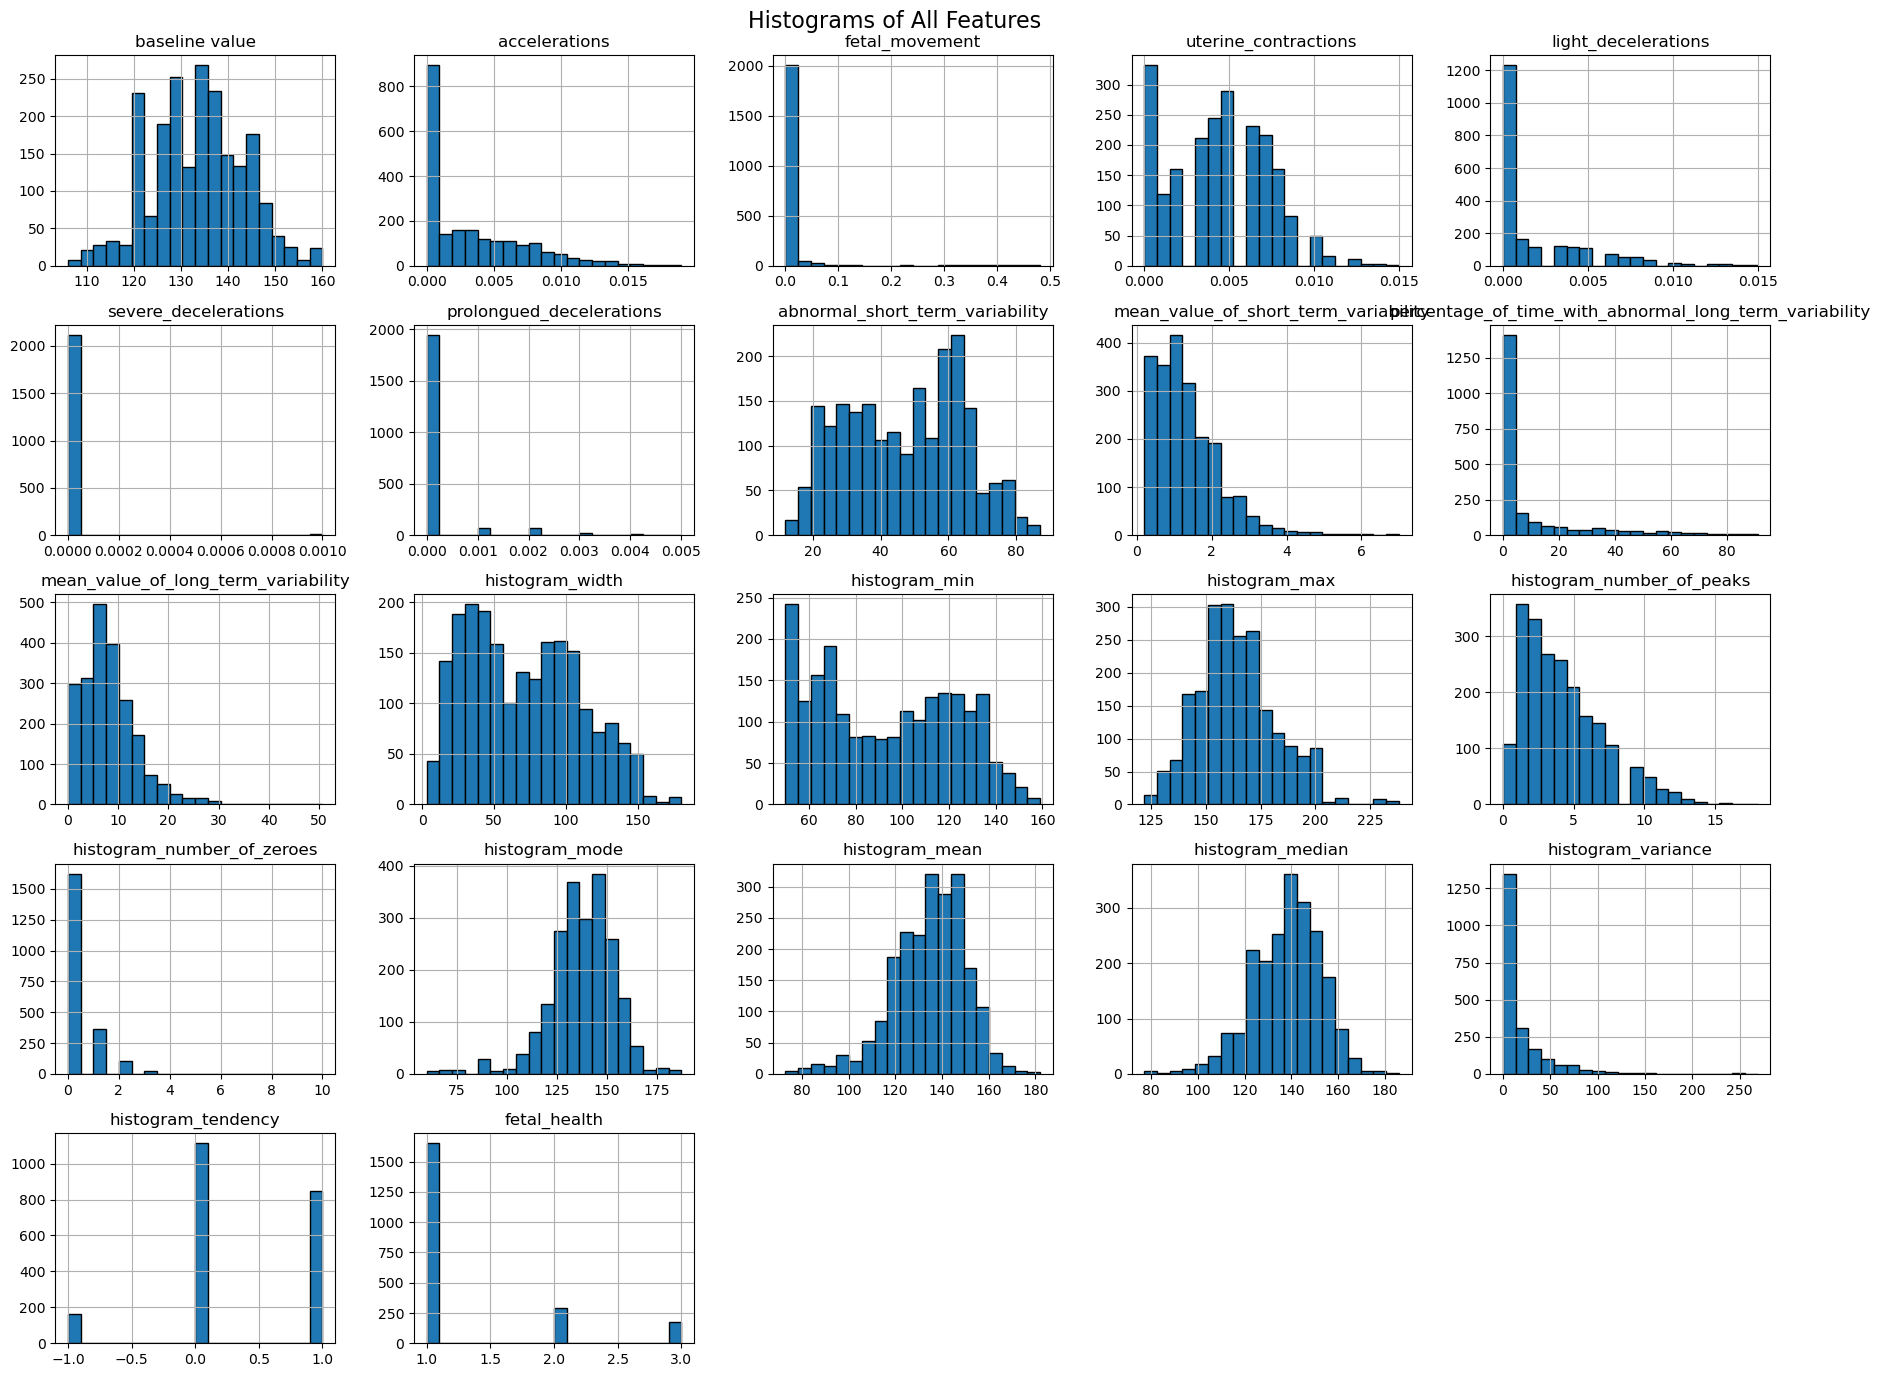

In [10]:
df.hist(bins=20, figsize=(18, 14), edgecolor='black')
plt.suptitle("Histograms of All Features", fontsize=16)
plt.tight_layout()
plt.show()

#### Features such as accelerations, severe decelarations and fetal movements are rightly skewed.
#### While, baseline value, histogram mean, median and mode are normally distributed.

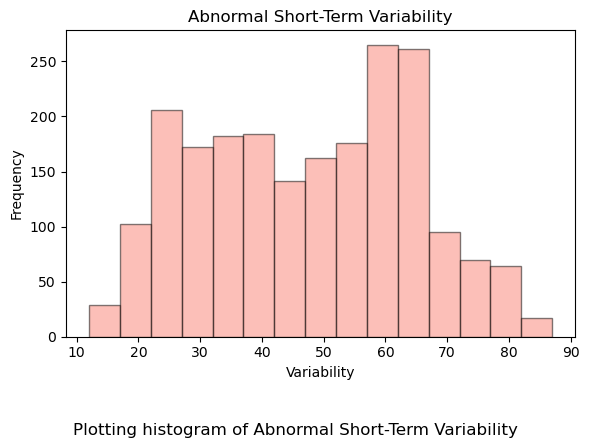

In [11]:
plt.figure(figsize=(6, 4))
plt.hist(df['abnormal_short_term_variability'], bins=15, color='salmon', edgecolor='black', alpha=0.5)

plt.title("Abnormal Short-Term Variability")
plt.xlabel("Variability")
plt.ylabel("Frequency")

plt.figtext(0.5, -0.1,
            "Plotting histogram of Abnormal Short-Term Variability",
            wrap=True, horizontalalignment='center', fontsize=12)

plt.tight_layout()
plt.show()

#### There are very few values of fetal health which are very low or very high.
#### Most values lie betweeen 20 and 70 showing uniform distribution.

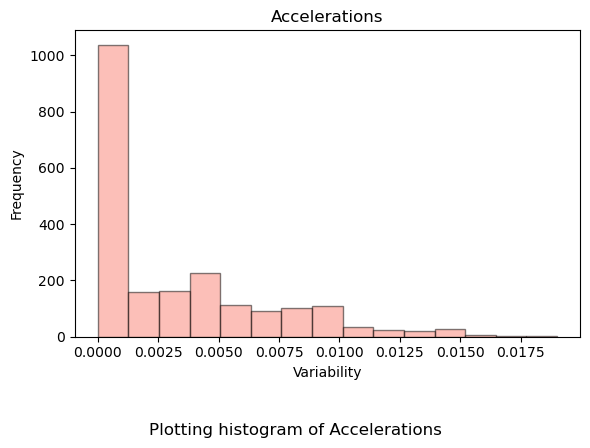

In [12]:
plt.figure(figsize=(6, 4))
plt.hist(df['accelerations'], bins=15, color='salmon', edgecolor='black', alpha=0.5)

plt.title("Accelerations")
plt.xlabel("Variability")
plt.ylabel("Frequency")

plt.figtext(0.5, -0.1,
            "Plotting histogram of Accelerations",
            wrap=True, horizontalalignment='center', fontsize=12)

plt.tight_layout()
plt.show()

#### Histogram is heavily right-skewed, which means most values are nearly zero.
#### It shows that fetal accelerations are rare or very low in most cases. Very few fetuses have high accelarations.

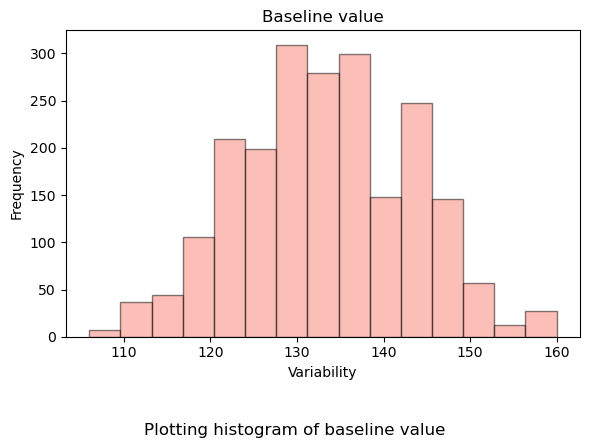

In [13]:
plt.figure(figsize=(6, 4))
plt.hist(df['baseline value'], bins=15, color='salmon', edgecolor='black', alpha=0.5)

plt.title("Baseline value")
plt.xlabel("Variability")
plt.ylabel("Frequency")

plt.figtext(0.5, -0.1,
            "Plotting histogram of baseline value",
            wrap=True, horizontalalignment='center', fontsize=12)

plt.tight_layout()
plt.show()

#### The histogram of baseline value shows a normal distribution mostly centered around 130–140 bpm.
#### This shows normal variation in fetal heart rate.

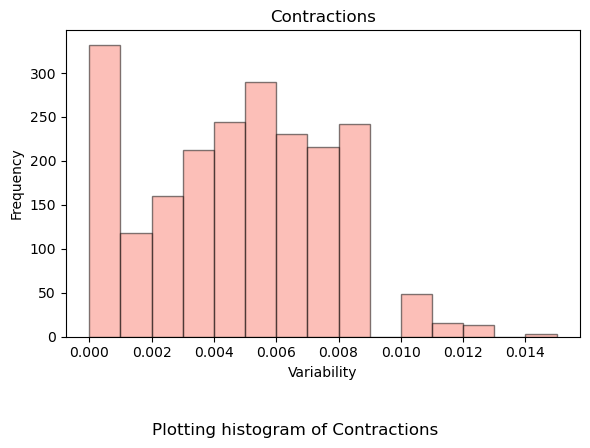

In [14]:
plt.figure(figsize=(6, 4))
plt.hist(df['uterine_contractions'], bins=15, color='salmon', edgecolor='black', alpha=0.5)

plt.title("Contractions")
plt.xlabel("Variability")
plt.ylabel("Frequency")

plt.figtext(0.5, -0.1,
            "Plotting histogram of Contractions",
            wrap=True, horizontalalignment='center', fontsize=12)

plt.tight_layout()
plt.show()

#### The histogram of contractions shows a right-skewed distribution
#### Majority of patients experience low uterine contraction activity during the monitoring period.

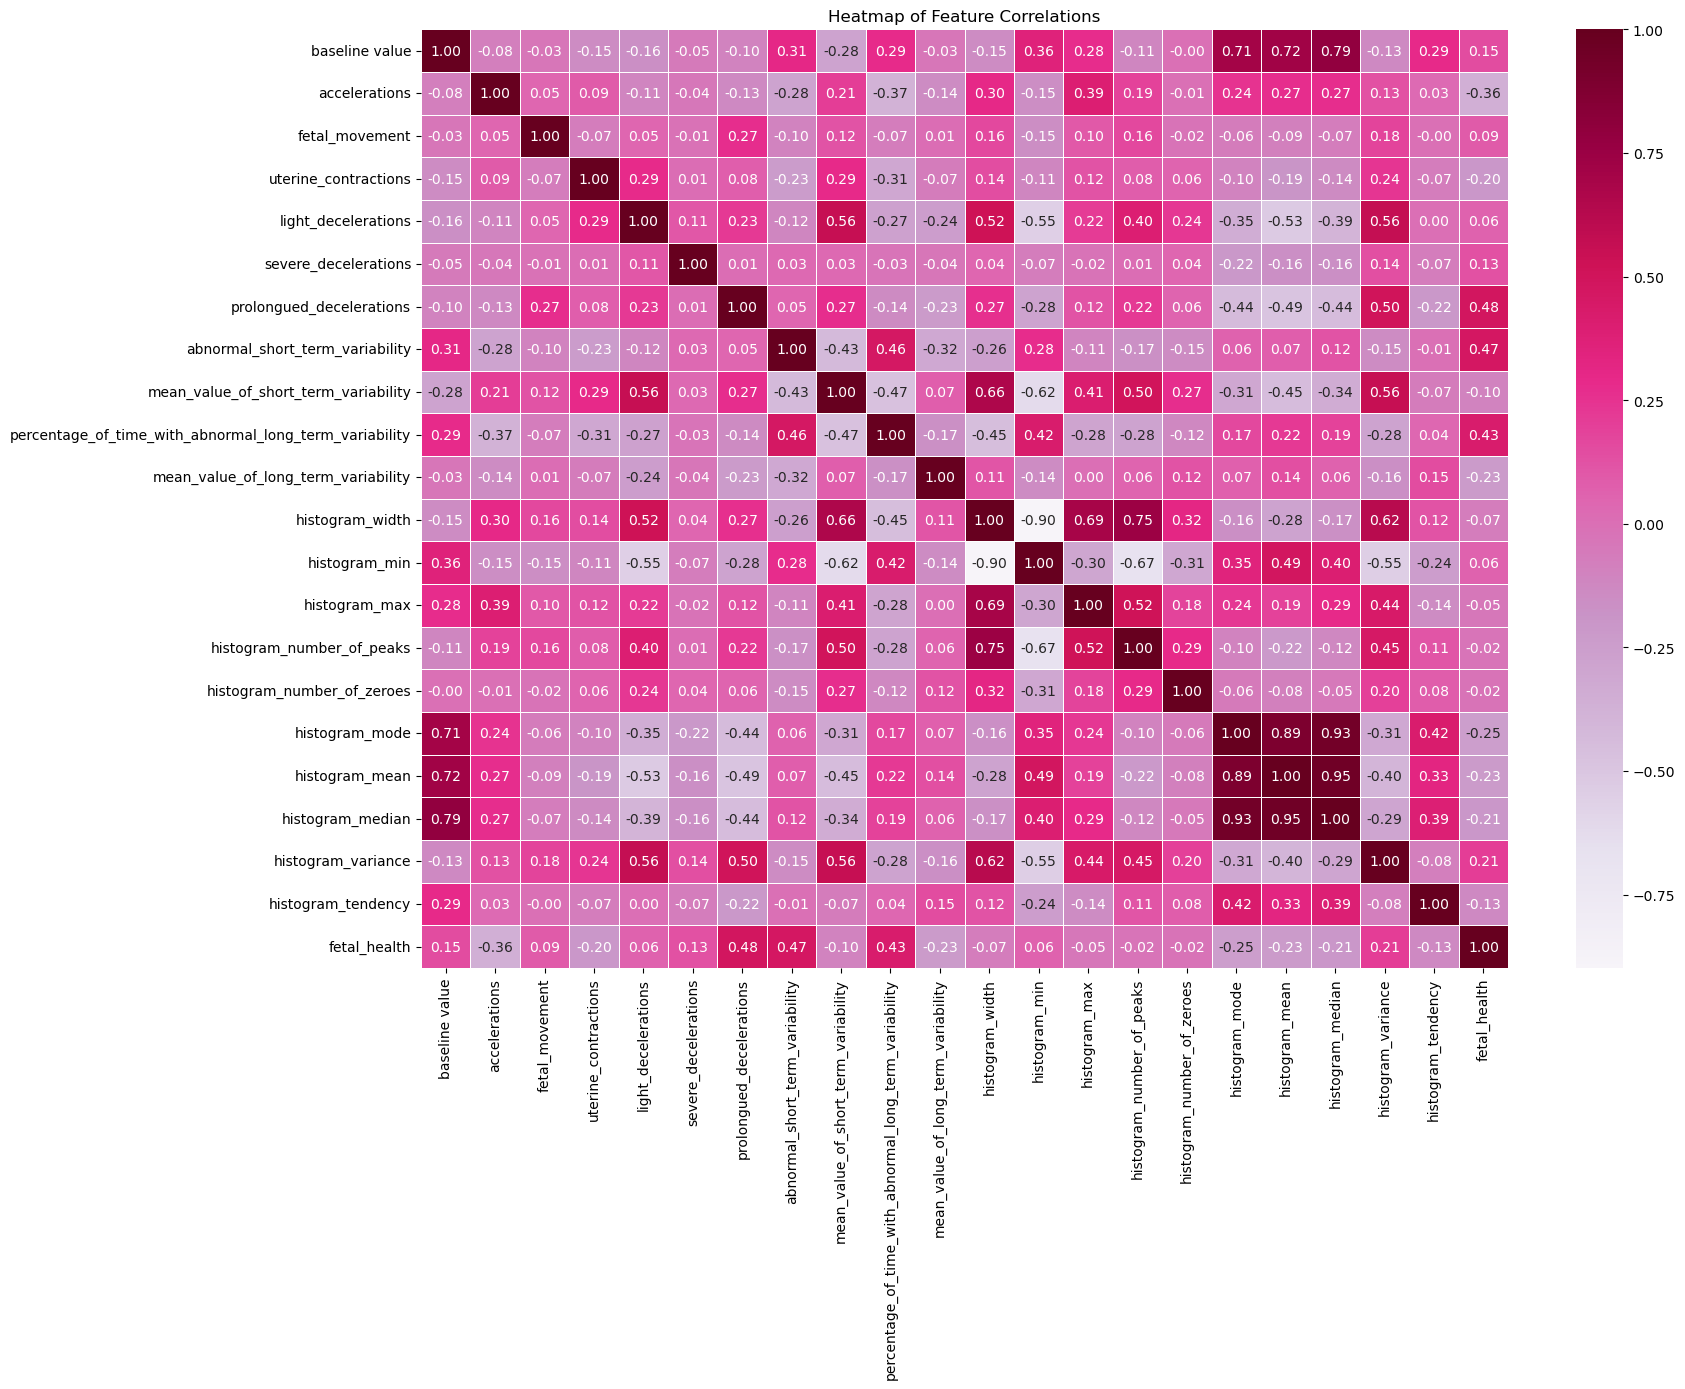

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 14))
corr_matrix = df.corr()

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="PuRd", linewidths=0.5)
plt.title("Heatmap of Feature Correlations")
plt.tight_layout()
plt.show()

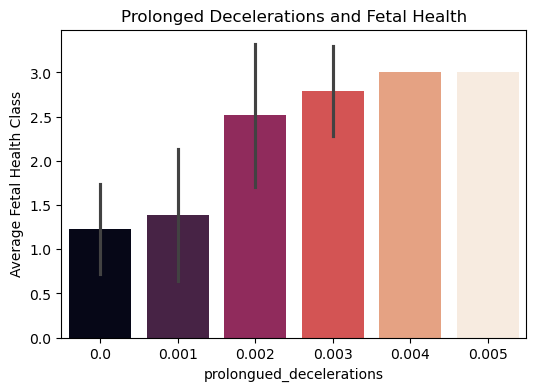

In [16]:
plt.figure(figsize=(6, 4))
sns.barplot(
    x="prolongued_decelerations",
    y="fetal_health",
    data=df,
    hue="prolongued_decelerations",
    palette="rocket",
    errorbar="sd",
    legend=False
)
plt.title("Prolonged Decelerations and Fetal Health")
plt.xlabel("prolongued_decelerations")
plt.ylabel("Average Fetal Health Class")
plt.show()

#### As prolonged decelerations increase, the average fetal health class also increases, showing worsening health condition.

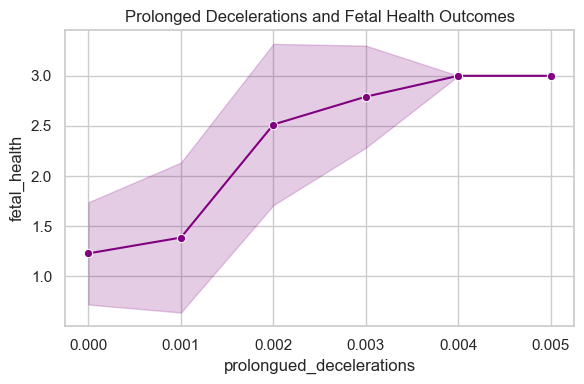

In [17]:
sns.set(style="whitegrid")

plt.figure(figsize=(6, 4))
sns.lineplot(
    x="prolongued_decelerations",
    y="fetal_health",
    data=df,
    errorbar="sd",
    marker="o",
    color="purple"
)
plt.title("Prolonged Decelerations and Fetal Health Outcomes")
plt.ylabel("fetal_health")
plt.xlabel("prolongued_decelerations")
plt.tight_layout()
plt.show()

#### As prolonged decelerations increase, the risk also increase. It is a strong predictor of fetal distress.

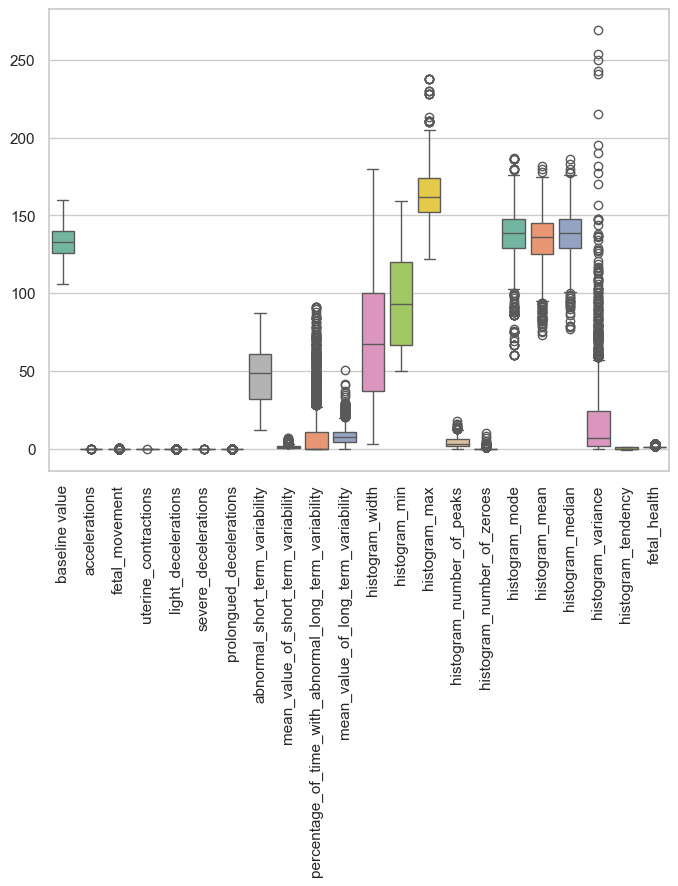

In [18]:
plt.figure(figsize=(8,6))
sns.boxplot(data = df,palette = "Set2")
plt.xticks(rotation=90)
plt.show()

### Feature Engineering

#### Remove outliers by interquartile range method by calculating lower and upper bounds for each column and filter out values outside of this range.

In [19]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    print(f"{column} → IQR: {IQR:.2f}, lower: {lower:.2f}, upper: {upper:.2f}")
    print(f"Outliers removed: {(df[(df[column] < lower) | (df[column] > upper)]).shape[0]}")
    
    return df[(df[column] >= lower) & (df[column] <= upper)].copy()

In [20]:
cols = ["histogram_variance", "histogram_median", "histogram_mean"]
for col in cols:
    df = remove_outliers_iqr(df, col)

histogram_variance → IQR: 22.00, lower: -31.00, upper: 57.00
Outliers removed: 184
histogram_median → IQR: 19.00, lower: 101.50, upper: 177.50
Outliers removed: 16
histogram_mean → IQR: 19.00, lower: 98.50, upper: 174.50
Outliers removed: 23


In [21]:
threshold = 0.9
correlation_matrix = df.corr()
strongly_correlated = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            strongly_correlated.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

for feature1, feature2, corr_value in strongly_correlated:
    print(f"{feature1} and {feature2} have a strong correlation of {corr_value:.2f}")

histogram_mean and histogram_mode have a strong correlation of 0.93
histogram_median and histogram_mode have a strong correlation of 0.97
histogram_median and histogram_mean have a strong correlation of 0.96


In [22]:
correlation_with_target = df[['histogram_mean', 'histogram_median', 'fetal_health']].corr()
print("Correlation with Target fetal_health:")
print(correlation_with_target)
mean_corr = correlation_with_target.loc['histogram_mean', 'fetal_health']
median_corr = correlation_with_target.loc['histogram_median', 'fetal_health']

Correlation with Target fetal_health:
                  histogram_mean  histogram_median  fetal_health
histogram_mean          1.000000          0.963051      0.156488
histogram_median        0.963051          1.000000      0.132670
fetal_health            0.156488          0.132670      1.000000


In [23]:
correlation_with_target = df[['histogram_mode', 'histogram_median', 'fetal_health']].corr()
print("Correlation with fetal_health:")
print(correlation_with_target)
mode_corr = correlation_with_target.loc['histogram_mode', 'fetal_health']
median_corr = correlation_with_target.loc['histogram_median', 'fetal_health']

Correlation with fetal_health:
                  histogram_mode  histogram_median  fetal_health
histogram_mode          1.000000          0.972456      0.119192
histogram_median        0.972456          1.000000      0.132670
fetal_health            0.119192          0.132670      1.000000


In [24]:
correlation_with_target = df[['histogram_mode', 'histogram_mean', 'fetal_health']].corr()
print("Correlation with fetal_health:")
print(correlation_with_target)
mode_corr = correlation_with_target.loc['histogram_mode', 'fetal_health']
median_corr = correlation_with_target.loc['histogram_mean', 'fetal_health']

Correlation with fetal_health:
                histogram_mode  histogram_mean  fetal_health
histogram_mode        1.000000        0.925313      0.119192
histogram_mean        0.925313        1.000000      0.156488
fetal_health          0.119192        0.156488      1.000000


#### Based on the correlation analysis, we decided to remove histogram_median and keep histogram_mode and histogram_mean for modeling, as these features have a stronger correlation with fetal_health - target variable.
#### This helps to avoid multicollinearity and improve performance of models.

In [25]:
df = df.drop(columns=["histogram_mode", "histogram_median"])

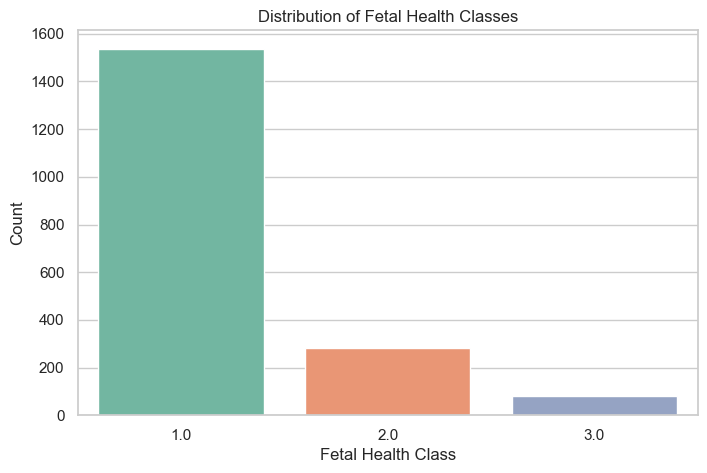

In [26]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.countplot(x="fetal_health", hue="fetal_health", data=df, palette="Set2", legend=False)
plt.title("Distribution of Fetal Health Classes")
plt.xlabel("Fetal Health Class")
plt.ylabel("Count")
plt.show()

#### The dataset is clearly imbalanced. For this we will perform stratified sampling.

In [27]:
df.fetal_health.value_counts()

fetal_health
1.0    1538
2.0     284
3.0      81
Name: count, dtype: int64

### Risk Score :

#### Principal Component Analysis is applied to convert multiple clinical features into a single risk score representing fetal risk. 
#### The features were first standardized, and PCA reduced them to one principal component that explains the most variance. 
#### This score was then scaled between 0 and 100 to create a continuous risk indicator. 

In [28]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
X_features_for_pca = df.drop(columns=["fetal_health"], errors='ignore')

scaler_pca = StandardScaler()
X_scaled_pca = scaler_pca.fit_transform(X_features_for_pca)

pca = PCA(n_components=1)
pca_scores = pca.fit_transform(X_scaled_pca).flatten()

risk_score_cont = MinMaxScaler(feature_range=(0, 100)).fit_transform(pca_scores.reshape(-1, 1)).flatten()
df["risk_score"] = risk_score_cont

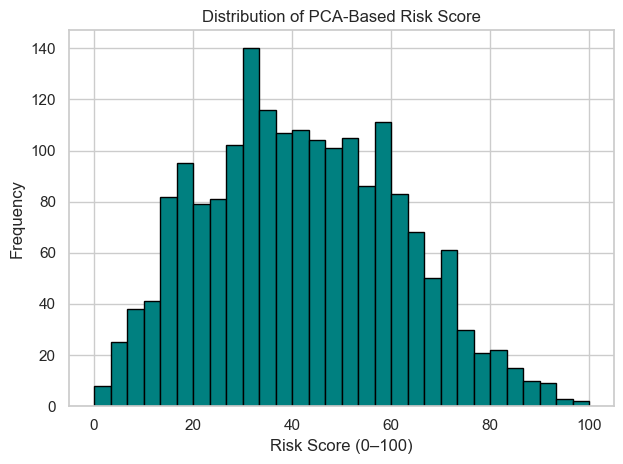

In [29]:
import matplotlib.pyplot as plt

plt.hist(df["risk_score"], bins=30, color='teal', edgecolor='black')
plt.title("Distribution of PCA-Based Risk Score")
plt.xlabel("Risk Score (0–100)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()


#### Distribution of PCA based risk scores.

In [30]:
def get_risk_level(score):
    if score <= 33:
        return "Low"
    elif score <= 66:
        return "Moderate"
    else:
        return "High"

### Train Test Split

#### The dataset is split using StratifiedShuffleSplit to preserve the class distribution of fetal health in both training and test sets.
#### This addresses class imbalance.

In [31]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_idx, test_idx in split.split(df, df["fetal_health"]):
    train_df = df.iloc[train_idx]
    test_df = df.iloc[test_idx]

X_train = train_df.drop(columns=["fetal_health", "risk_score"])
y_train = train_df["risk_score"]
X_test = test_df.drop(columns=["fetal_health", "risk_score"])
y_test = test_df["risk_score"]

### Evaluation Function

In [32]:
def evaluate_regression_model(y_true, y_pred, model_name="Model"):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    print(f"\nEvaluation Metrics for {model_name}:")
    print(f"MAE  : {mae:.2f}")
    print(f"MSE  : {mse:.2f}")
    print(f"RMSE : {rmse:.2f}")
    print(f"R²   : {r2:.4f}")

def visualize_regression_model(y_true, y_pred, model_name="Model"):
    plt.figure(figsize=(6,5))
    plt.scatter(y_true, y_pred, alpha=0.5, color='teal')
    plt.plot([0, 100], [0, 100], '--', color='red')
    plt.title(f"{model_name} - Predicted vs Actual")
    plt.xlabel("Actual Risk Score")
    plt.ylabel("Predicted Risk Score")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

## Ridge Regression Standard :

In [33]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
import shap
import pandas as pd
import numpy as np

### Scale the data

In [34]:
scaler_std = StandardScaler()
X_train_scaled_std = scaler_std.fit_transform(X_train)
X_test_scaled_std = scaler_std.transform(X_test)

### Define the model

In [35]:
ridge = Ridge(alpha=50.0)
ridge.fit(X_train_scaled_std, y_train)

Ridge(alpha=50.0)

In [36]:
y_pred_ridge = ridge.predict(X_test_scaled_std)
y_pred_ridge = np.clip(y_pred_ridge, 0, 100)

### Evaluate the model

In [37]:
evaluate_regression_model(y_test, y_pred_ridge, model_name="Standard Ridge Regression")


Evaluation Metrics for Standard Ridge Regression:
MAE  : 0.10
MSE  : 0.01
RMSE : 0.12
R²   : 1.0000


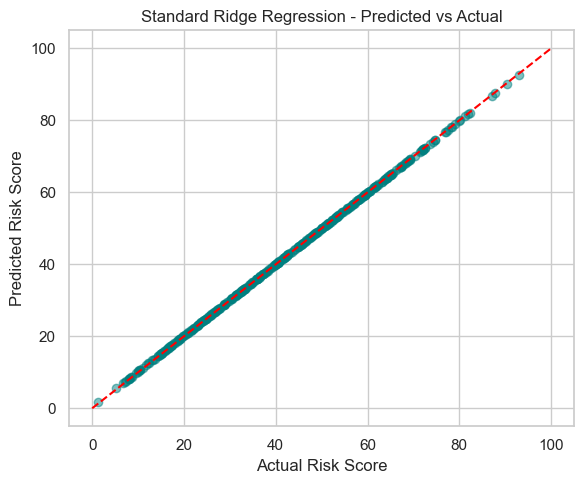

In [38]:
visualize_regression_model(y_test, y_pred_ridge, model_name="Standard Ridge Regression")

In [39]:
ridge_df = pd.DataFrame({
    "Predicted Risk Score": y_pred_ridge
})
ridge_df["Predicted Risk Group"] = ridge_df["Predicted Risk Score"].apply(get_risk_level)
print(ridge_df.sample(n=10, random_state=42))

     Predicted Risk Score Predicted Risk Group
266             23.131855                  Low
192             40.560241             Moderate
46              44.784940             Moderate
55              48.601483             Moderate
57              71.949647                 High
39              44.885787             Moderate
163             69.113870                 High
364             30.603867                  Low
210             31.757618                  Low
94              10.505577                  Low


### SHAP

In [40]:
explainer_ridge= shap.Explainer(ridge, X_test_scaled_std)
shap_values_ridge = explainer_ridge(X_test_scaled_std)

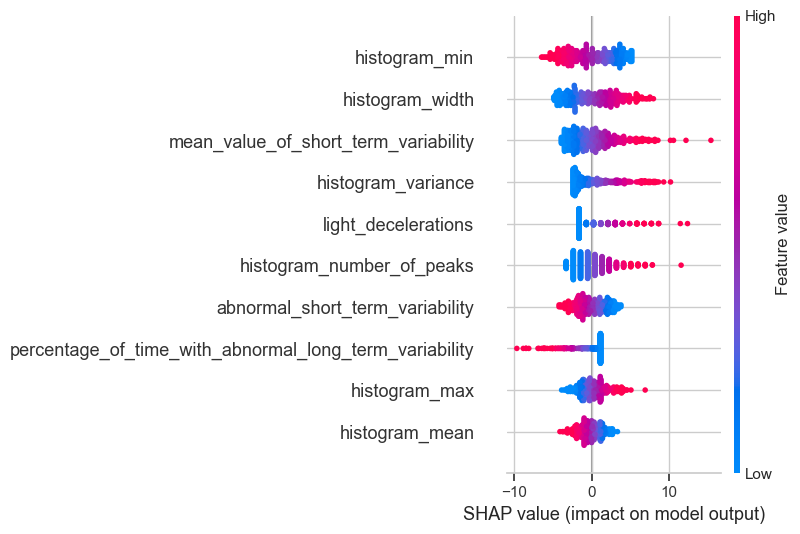

In [41]:
shap.summary_plot(shap_values_ridge, X_test_scaled_std, feature_names=X_test.columns, max_display=10)

#### Features like histogram_min, histogram_width, and mean_value_of_short_term_variability have the strongest influence on the risk score.

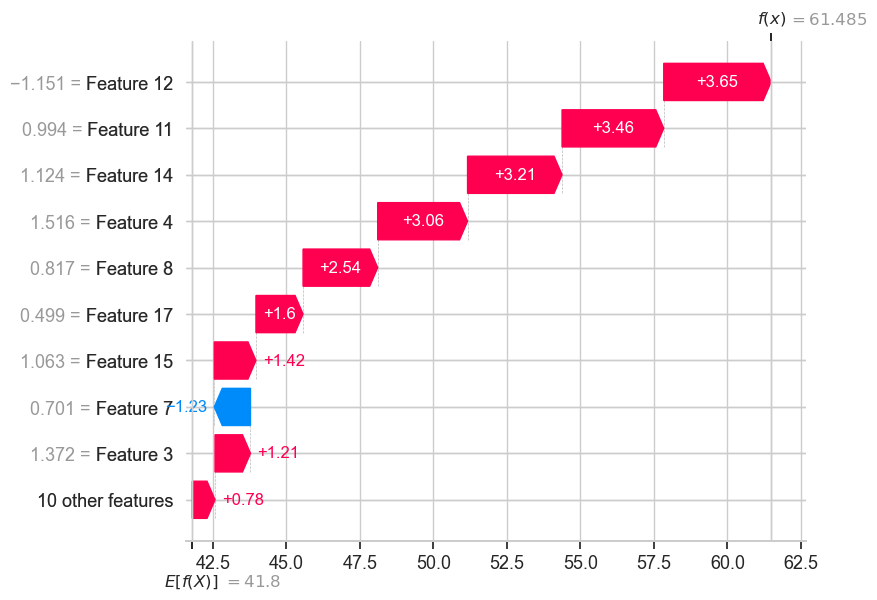

In [42]:
shap.plots.waterfall(shap_values_ridge[0], max_display=10)

## Custom Ridge Regression

### Scale the data

In [43]:
scaler_std = StandardScaler()
X_train_scaled_std = scaler_std.fit_transform(X_train)
X_test_scaled_std = scaler_std.transform(X_test)

### Define the model

In [44]:
class CustomRidgeRegression:
    def __init__(self, alpha=200.0):
        self.alpha = alpha
        self.weights = None

    def fit(self, X, y):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        I = np.eye(X_b.shape[1])
        I[0, 0] = 0 
        self.weights = np.linalg.inv(X_b.T @ X_b + self.alpha * I) @ X_b.T @ y

    def predict(self, X):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        return X_b @ self.weights

### Train and Fit the Model

In [45]:
ridge_custom = CustomRidgeRegression(alpha=100.0)
ridge_custom.fit(X_train_scaled_std, y_train)
y_pred_ridge_custom = ridge_custom.predict(X_test_scaled_std)
y_pred_ridge_custom = np.clip(y_pred_ridge_custom, 0, 100)

### Evaluate the model

In [46]:
evaluate_regression_model(y_test, y_pred_ridge_custom, model_name="Custom Ridge Regression")


Evaluation Metrics for Custom Ridge Regression:
MAE  : 0.20
MSE  : 0.06
RMSE : 0.23
R²   : 0.9999


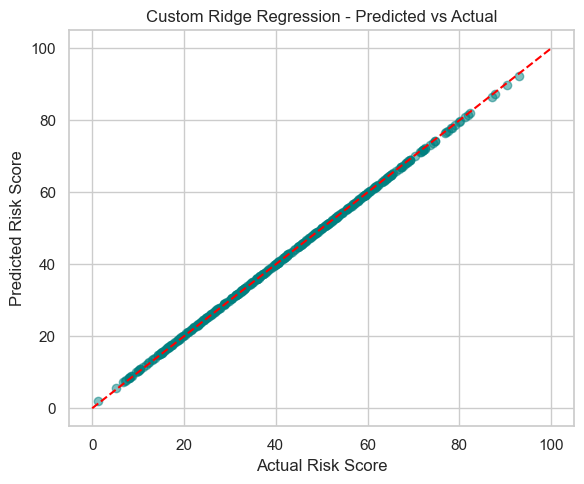

In [47]:
visualize_regression_model(y_test, y_pred_ridge_custom, model_name="Custom Ridge Regression")

### Predictions

In [48]:
ridge_custom_df = pd.DataFrame({
    "Predicted Risk Score": y_pred_ridge_custom
})
ridge_custom_df["Predicted Risk Group"] = ridge_custom_df["Predicted Risk Score"].apply(get_risk_level)
print(ridge_df.sample(n=10))

     Predicted Risk Score Predicted Risk Group
93              41.985009             Moderate
372             39.199306             Moderate
117             41.108763             Moderate
334             55.162282             Moderate
87              12.450497                  Low
253             31.965580                  Low
298             72.262234                 High
161             65.498164             Moderate
330             30.585940                  Low
272             59.099398             Moderate


### SHAP

In [49]:
X_sample = X_test_scaled_std[:50]
predict_fn_customridge = lambda x: ridge_custom.predict(x)
explainer_customridge = shap.KernelExplainer(predict_fn_customridge, X_train_scaled_std[:50])
shap_values_customridge = explainer_customridge.shap_values(X_sample)

  0%|          | 0/50 [00:00<?, ?it/s]

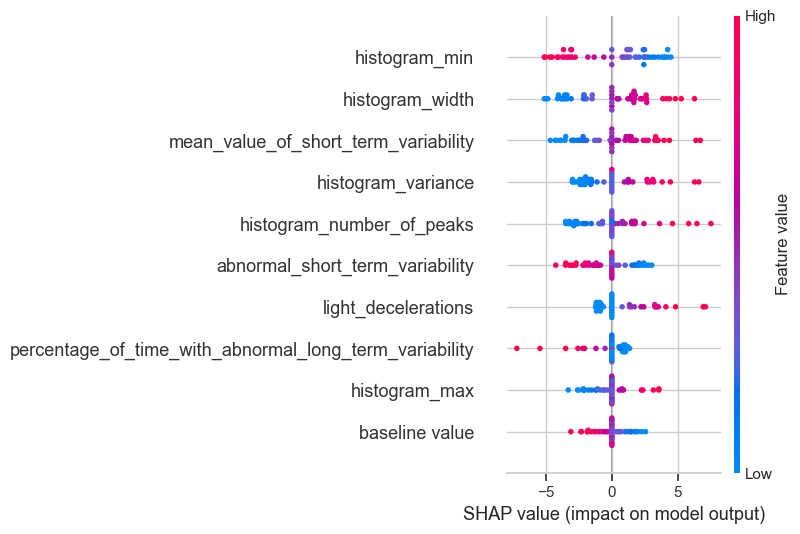

In [50]:
shap.summary_plot(shap_values_customridge, X_sample, feature_names=X_test.columns, max_display=10)

#### Features like histogram_min, histogram_width, and mean_value_of_short_term_variability have the most influence in predicting fetal risk scores. 

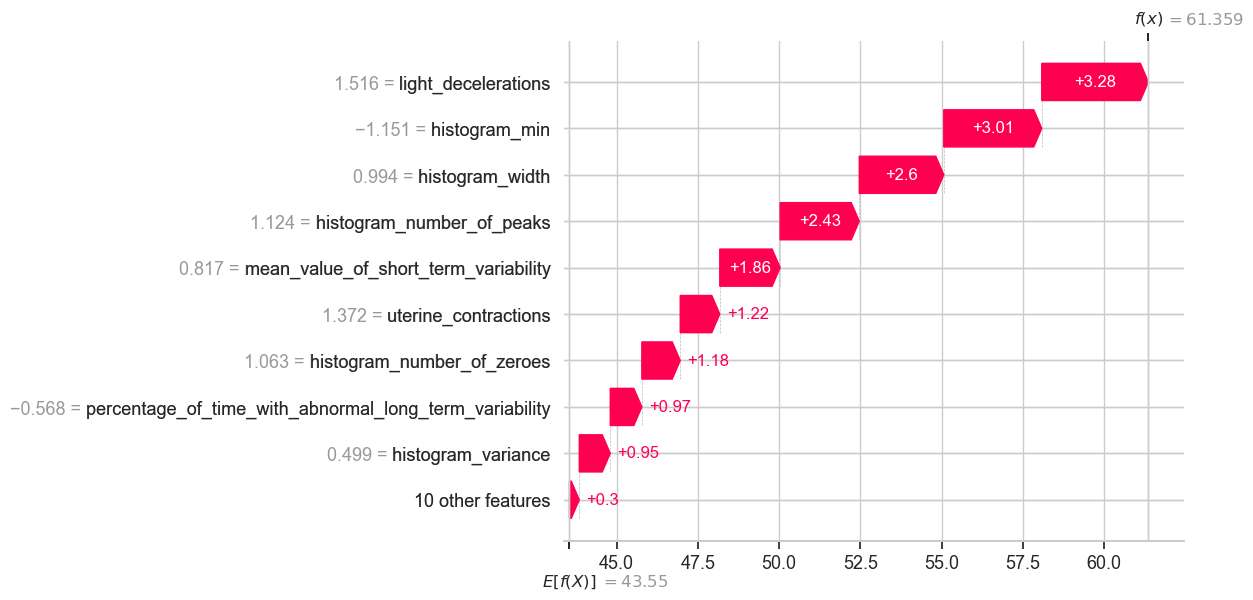

In [51]:
shap_expl = shap.Explanation(
    values=shap_values_customridge,
    base_values=explainer_customridge.expected_value,
    data=X_sample,
    feature_names=X_test.columns
)
shap.plots.waterfall(shap_expl[0], max_display=10)

## Random Forest Regression Standard

In [52]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import numpy as np
import shap

### Set up parameters

In [53]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

### Training and fitting model

In [54]:
rf = RandomForestRegressor(random_state=42)

In [55]:
rf_grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5,
                       scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_
y_pred_rf = best_rf.predict(X_test)
y_pred_rf = np.clip(y_pred_rf, 0, 100)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


In [56]:
evaluate_regression_model(y_test, y_pred_rf, model_name="Random Forest Regressor Standard")


Evaluation Metrics for Random Forest Regressor Standard:
MAE  : 1.55
MSE  : 4.83
RMSE : 2.20
R²   : 0.9870


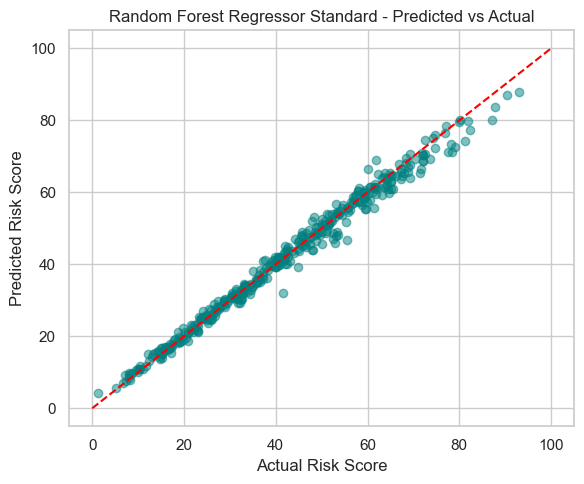

In [57]:
visualize_regression_model(y_test, y_pred_rf, model_name="Random Forest Regressor Standard")

### Predictions

In [58]:
rf_pred_df = pd.DataFrame({
    "Predicted Risk Score": y_pred_rf
})
rf_pred_df["Predicted Risk Group"] = rf_pred_df["Predicted Risk Score"].apply(get_risk_level)
print(rf_pred_df.sample(10))

     Predicted Risk Score Predicted Risk Group
104             32.813026                  Low
355             31.371115                  Low
24              55.684961             Moderate
249             54.083783             Moderate
270             15.781826                  Low
315             51.485932             Moderate
358             29.353361                  Low
130             16.272854                  Low
20              31.966131                  Low
233              7.967776                  Low


### SHAP

 96%|=================== | 366/381 [00:17<00:00]       

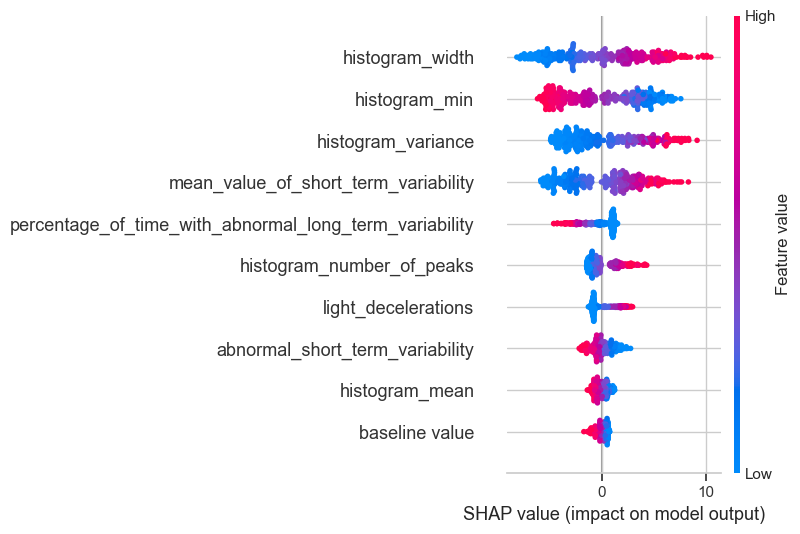

In [59]:
explainer_rf = shap.Explainer(best_rf, X_test)
shap_values_rf = explainer_rf(X_test, check_additivity=False)
shap.summary_plot(shap_values_rf, X_test, feature_names=X_test.columns, max_display=10)

#### Features like histogram_width, histogram_min, and histogram_variance have the greatest influence on fetal risk prediction.

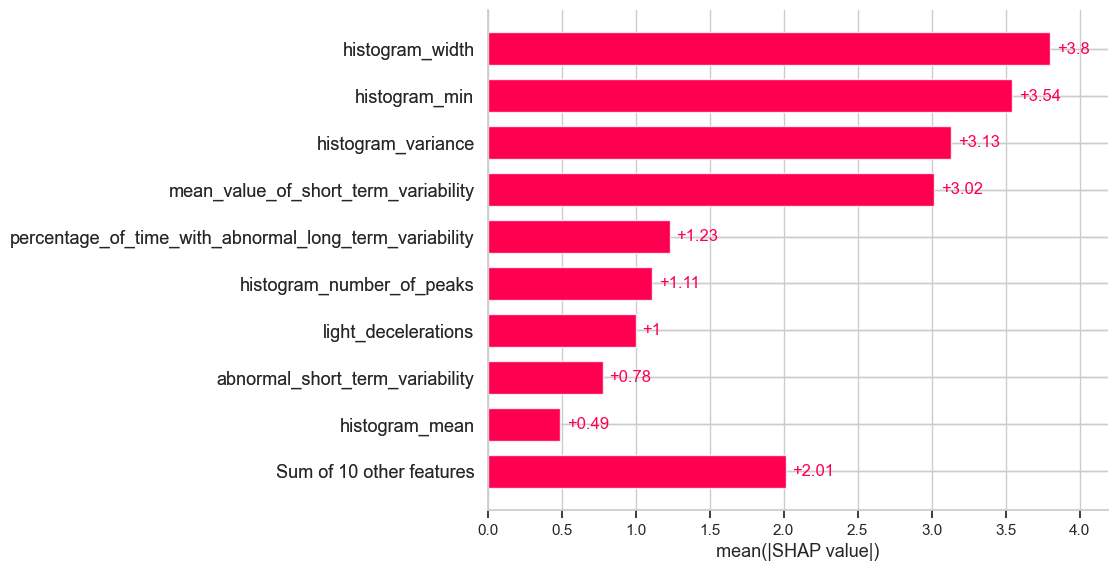

In [60]:
shap.plots.bar(shap_values_rf, max_display=10)

## Random Forest Regression Custom

In [61]:
class CustomDecisionTreeRegressor:
    def __init__(self, max_depth=None, min_samples_split=2):
        from sklearn.tree import DecisionTreeRegressor
        self.model = DecisionTreeRegressor(max_depth=max_depth, min_samples_split=min_samples_split)

    def fit(self, X, y):
        self.model.fit(X, y)

    def predict(self, X):
        return self.model.predict(X)
        
class CustomRandomForestRegressor:
    def __init__(self, n_estimators=1000, max_depth=None, min_samples_split=2, max_samples=1.0, random_state=None):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.max_samples = max_samples
        self.random_state = random_state
        self.trees = []

    def fit(self, X, y):
        np.random.seed(self.random_state)
        self.trees = []
        n_samples = int(self.max_samples * X.shape[0]) if self.max_samples <= 1.0 else X.shape[0]

        for _ in range(self.n_estimators):
            indices = np.random.choice(X.shape[0], size=n_samples, replace=True)
            X_sample = X[indices]
            y_sample = y[indices]

            tree = CustomDecisionTreeRegressor(max_depth=self.max_depth, min_samples_split=self.min_samples_split)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def predict(self, X):
        tree_preds = np.array([tree.predict(X) for tree in self.trees])
        return np.mean(tree_preds, axis=0)

### Train and Fit the Model

In [62]:
custom_rf = CustomRandomForestRegressor(
    n_estimators=1000,
    max_depth=15,
    min_samples_split=4,
    max_samples=0.7,
    random_state=42
)

custom_rf.fit(X_train.values, y_train.values)

In [63]:
y_pred_custom_rf = custom_rf.predict(X_test.values)
y_pred_custom_rf = np.clip(y_pred_custom_rf, 0, 100)

### Evaluate the model

In [64]:
evaluate_regression_model(y_test, y_pred_custom_rf, model_name="Custom Random Forest Regressor")


Evaluation Metrics for Custom Random Forest Regressor:
MAE  : 1.82
MSE  : 6.54
RMSE : 2.56
R²   : 0.9824


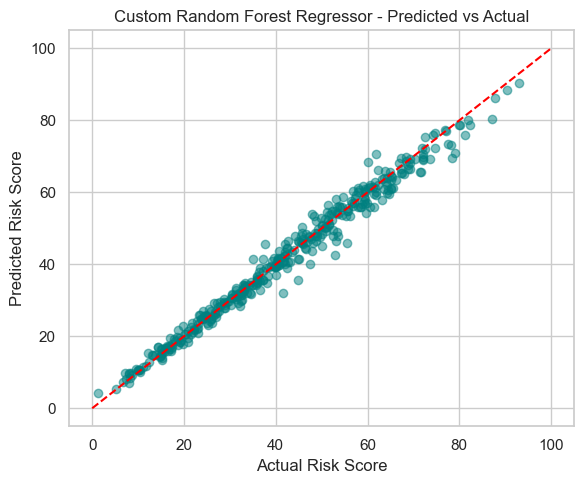

In [65]:
visualize_regression_model(y_test, y_pred_custom_rf, model_name="Custom Random Forest Regressor")

In [66]:
custom_rf_df = pd.DataFrame({
    "Predicted Risk Score": y_pred_custom_rf
})
custom_rf_df["Predicted Risk Group"] = custom_rf_df["Predicted Risk Score"].apply(get_risk_level)
print(custom_rf_df.sample(10, random_state=42))

     Predicted Risk Score Predicted Risk Group
266             22.260427                  Low
192             40.381083             Moderate
46              41.601018             Moderate
55              48.658157             Moderate
57              69.077980                 High
39              35.658802             Moderate
163             68.259498                 High
364             31.681640                  Low
210             31.630286                  Low
94              10.589010                  Low


### SHAP

  0%|          | 0/50 [00:00<?, ?it/s]

/var/folders/b1/16_x6jsn3gl1_mr01w2trxyc0000gn/T/ipykernel_40622/4236073209.py:5: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values_custom_rf, X_sample, feature_names=X_test.columns, max_display=10)


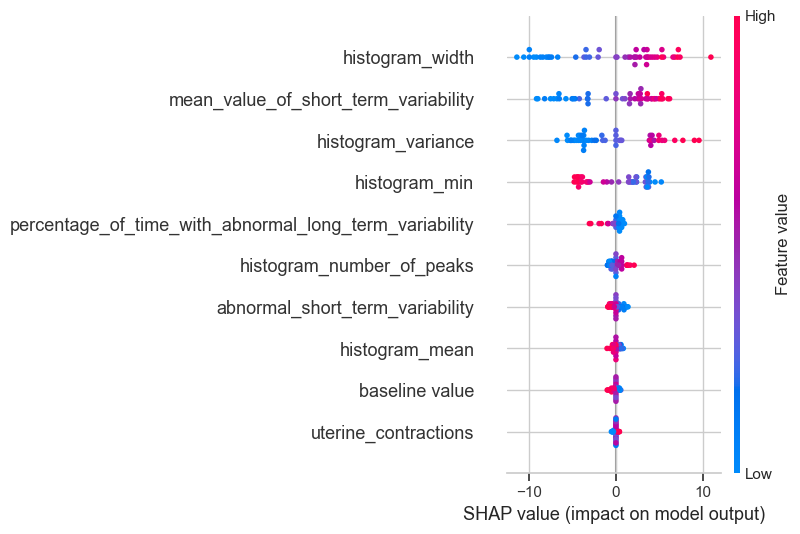

In [67]:
X_sample = X_test.values[:50]
predict_fn_custom = lambda x: custom_rf.predict(x)
explainer_custom_rf = shap.KernelExplainer(predict_fn_custom, X_train.values[:50])
shap_values_custom_rf = explainer_custom_rf.shap_values(X_sample)
shap.summary_plot(shap_values_custom_rf, X_sample, feature_names=X_test.columns, max_display=10)

#### Features like histogram_width, histogram_min, and histogram_variance have the biggest influence on fetal risk prediction.

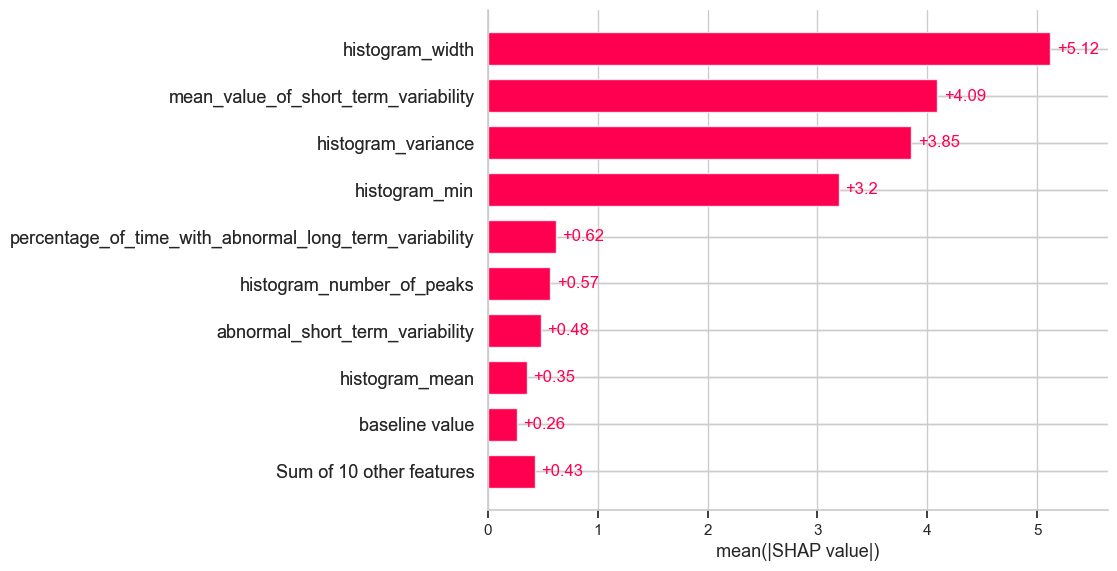

In [68]:
shap_expl_custom_rf = shap.Explanation(
    values=shap_values_custom_rf,
    base_values=np.repeat(explainer_custom_rf.expected_value, X_sample.shape[0]),
    data=X_sample,
    feature_names=X_test.columns
)

shap.plots.bar(shap_expl_custom_rf, max_display=10)

## XGBoost Standard

In [69]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

### Train and Fit the Model

In [70]:
xgb_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

In [71]:
xgb_model = XGBRegressor(random_state=42)
xgb_grid = GridSearchCV(
    estimator=xgb_model,
    param_grid=xgb_param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1,
    verbose=1
)
xgb_grid.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.05, 0.1], 'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200], 'subsample': [0.8, 1.0]},
             scoring='neg_mean_squared_error', verbose=1)

In [72]:
best_xgb = xgb_grid.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)
y_pred_xgb = np.clip(y_pred_xgb, 0, 100)
evaluate_regression_model(y_test, y_pred_xgb, model_name="XGBoost Regressor")


Evaluation Metrics for XGBoost Regressor:
MAE  : 1.27
MSE  : 2.80
RMSE : 1.67
R²   : 0.9924


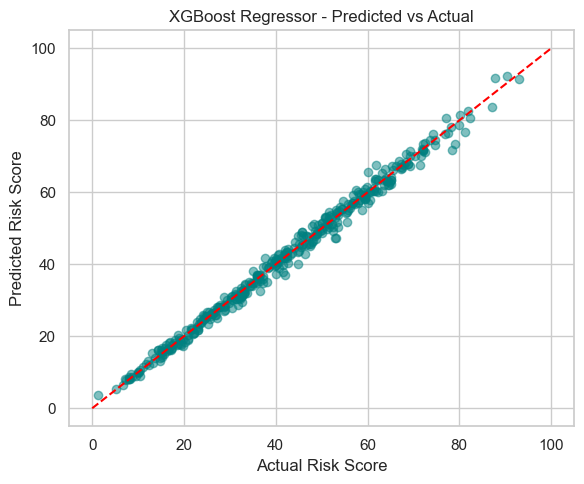

In [73]:
visualize_regression_model(y_test, y_pred_xgb, model_name="XGBoost Regressor")

### Predictions

In [74]:
xgb_pred_df = pd.DataFrame({
    "Predicted Risk Score": y_pred_xgb
})
xgb_pred_df["Predicted Risk Group"] = xgb_pred_df["Predicted Risk Score"].apply(get_risk_level)
print(xgb_pred_df.sample(10))

     Predicted Risk Score Predicted Risk Group
39              39.993347             Moderate
58              20.734489                  Low
48               8.588870                  Low
247             92.238274                 High
250             27.140219                  Low
278             18.455519                  Low
38              60.000443             Moderate
80               8.913152                  Low
171             17.670319                  Low
63              57.265900             Moderate


### SHAP

/var/folders/b1/16_x6jsn3gl1_mr01w2trxyc0000gn/T/ipykernel_40622/3768267974.py:3: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values_xgb, X_test, feature_names=X_test.columns, max_display=10)


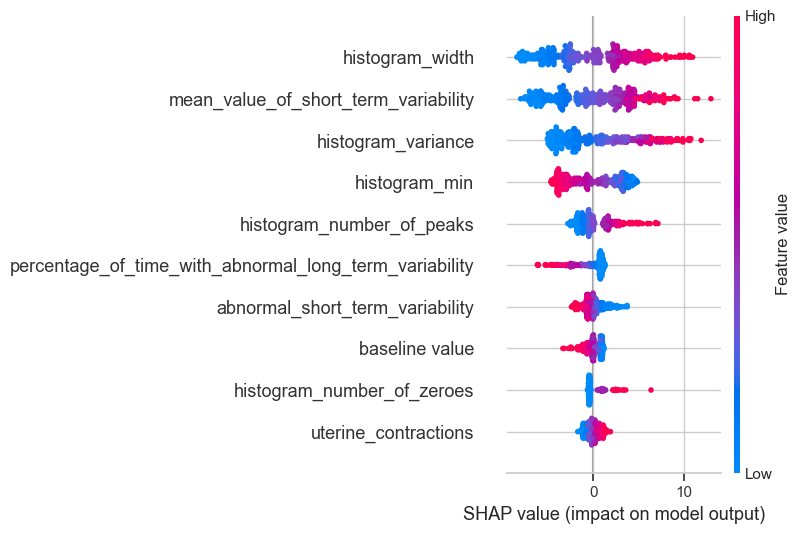

In [75]:
explainer_xgb = shap.Explainer(best_xgb, X_test)
shap_values_xgb = explainer_xgb(X_test)
shap.summary_plot(shap_values_xgb, X_test, feature_names=X_test.columns, max_display=10)

#### Features like histogram width, mean value of short term variability and histogram variance have high influence on fetal risk prediction.

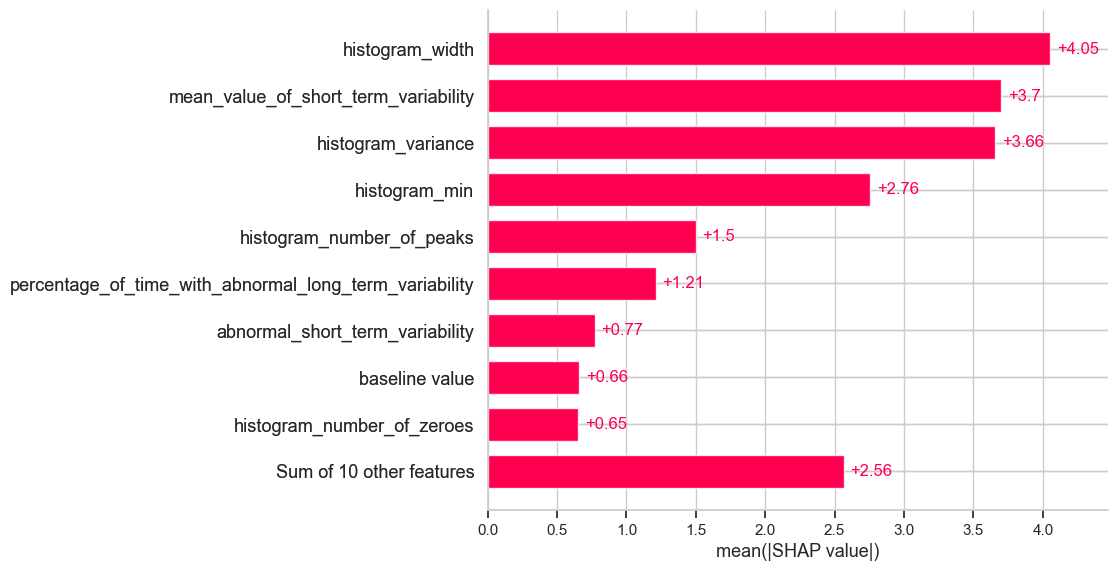

In [76]:
shap.plots.bar(shap_values_xgb, max_display=10)

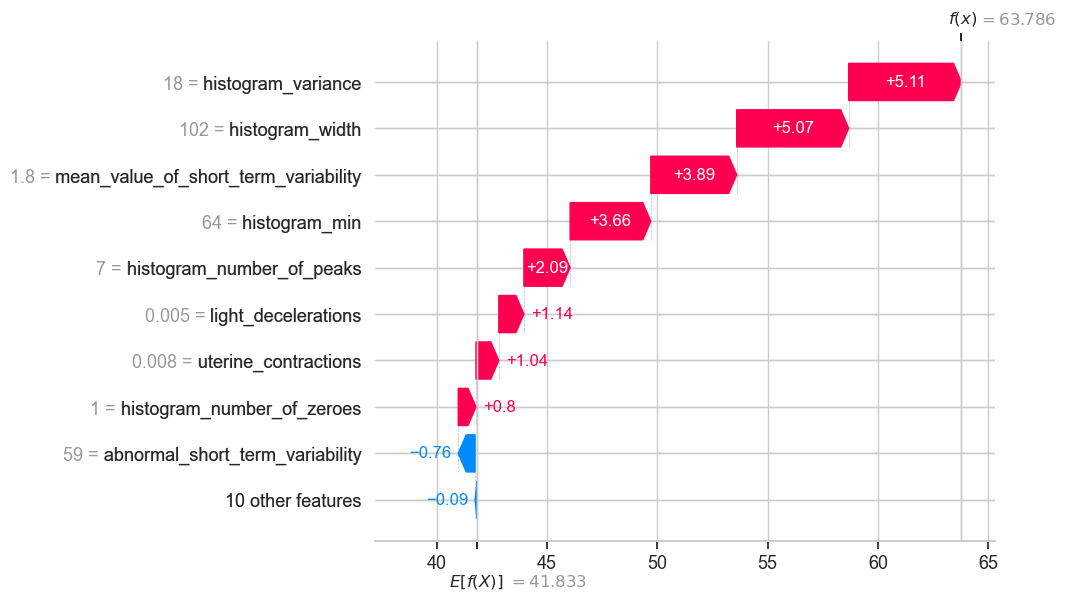

In [77]:
shap.plots.waterfall(shap_values_xgb[0], max_display=10)

### XGBoost Custom

In [78]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor

class CustomXGBoostRegressor:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.trees = []
        self.tree_weights = []
        self.initial_prediction = None

    def fit(self, X, y):
        self.trees = []
        self.tree_weights = []
        self.initial_prediction = np.mean(y)
        y_pred = np.full_like(y, self.initial_prediction, dtype=np.float64)

        for i in range(self.n_estimators):
            residuals = y - y_pred
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X, residuals)
            update = tree.predict(X)
            y_pred += self.learning_rate * update
            self.trees.append(tree)
            self.tree_weights.append(self.learning_rate)

    def predict(self, X):
        y_pred = np.full(X.shape[0], self.initial_prediction, dtype=np.float64)
        for tree, weight in zip(self.trees, self.tree_weights):
            y_pred += weight * tree.predict(X)
        return y_pred

### Train and Fit the Model

In [79]:
custom_xgb = CustomXGBoostRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
custom_xgb.fit(X_train.values, y_train.values)
y_pred_custom_xgb = custom_xgb.predict(X_test.values)
y_pred_custom_xgb = np.clip(y_pred_custom_xgb, 0, 100)

### Evaluate the model

In [80]:
evaluate_regression_model(y_test, y_pred_custom_xgb, model_name="Custom XGBoost")


Evaluation Metrics for Custom XGBoost:
MAE  : 1.52
MSE  : 4.16
RMSE : 2.04
R²   : 0.9888


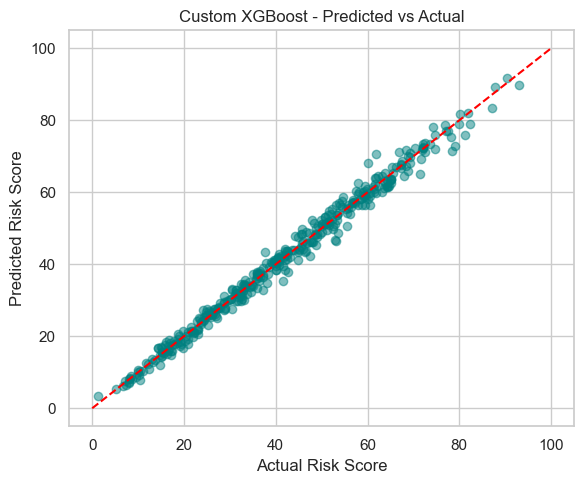

In [81]:
visualize_regression_model(y_test, y_pred_custom_xgb, model_name="Custom XGBoost")

### Predictions

In [82]:
custom_xgb_df = pd.DataFrame({
    "Predicted Risk Score": y_pred_custom_xgb
})
custom_xgb_df["Predicted Risk Group"] = custom_xgb_df["Predicted Risk Score"].apply(get_risk_level)
print(custom_xgb_df.sample(10))

     Predicted Risk Score Predicted Risk Group
350             42.540979             Moderate
230             40.406334             Moderate
194             48.348265             Moderate
372             40.236558             Moderate
360             60.093021             Moderate
361             42.310962             Moderate
239             57.265616             Moderate
268             14.501245                  Low
217             71.056151                 High
192             41.899462             Moderate


### SHAP

In [83]:
predict_fn_custom_xgb = lambda x: custom_xgb.predict(x)
X_background = X_train.values[:50]
X_sample = X_test.values[:50]
explainer_custom_xgb = shap.KernelExplainer(predict_fn_custom_xgb, X_background)
shap_values_custom_xgb = explainer_custom_xgb.shap_values(X_sample)

  0%|          | 0/50 [00:00<?, ?it/s]

/var/folders/b1/16_x6jsn3gl1_mr01w2trxyc0000gn/T/ipykernel_40622/607539687.py:8: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_expl_custom_xgb, X_sample, max_display=10)


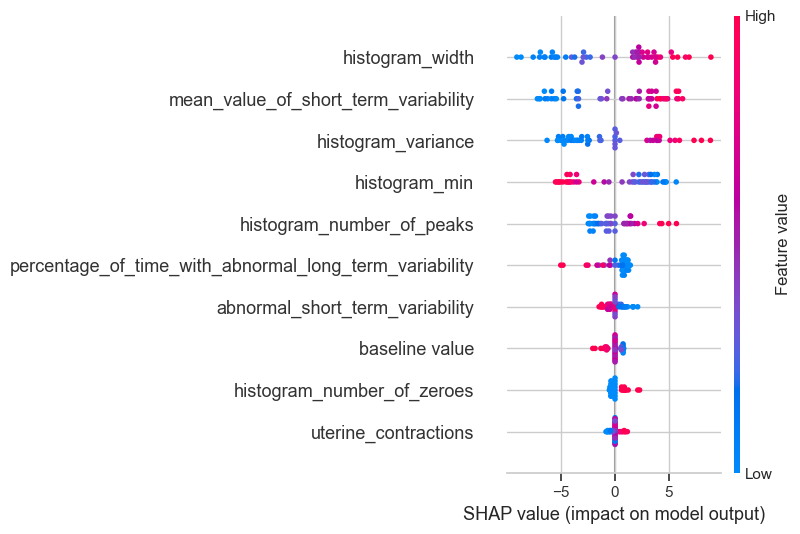

In [84]:
shap_expl_custom_xgb = shap.Explanation(
    values=shap_values_custom_xgb,
    base_values=np.repeat(explainer_custom_xgb.expected_value, X_sample.shape[0]),
    data=X_sample,
    feature_names=X_test.columns
)

shap.summary_plot(shap_expl_custom_xgb, X_sample, max_display=10)

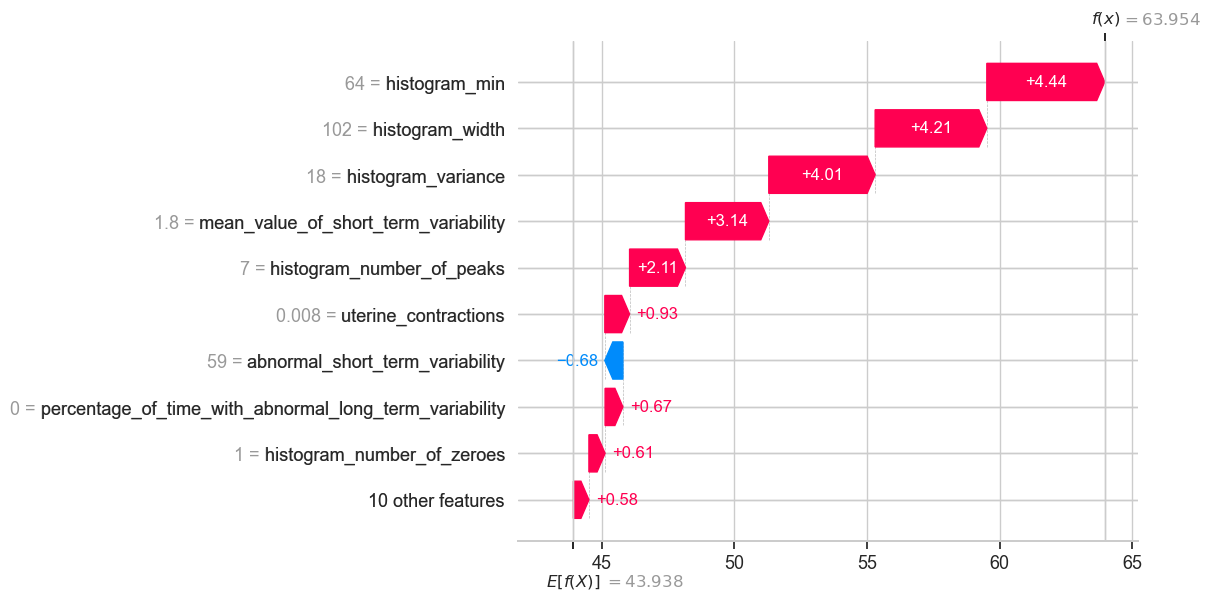

In [85]:
shap.plots.waterfall(shap_expl_custom_xgb[0], max_display=10)

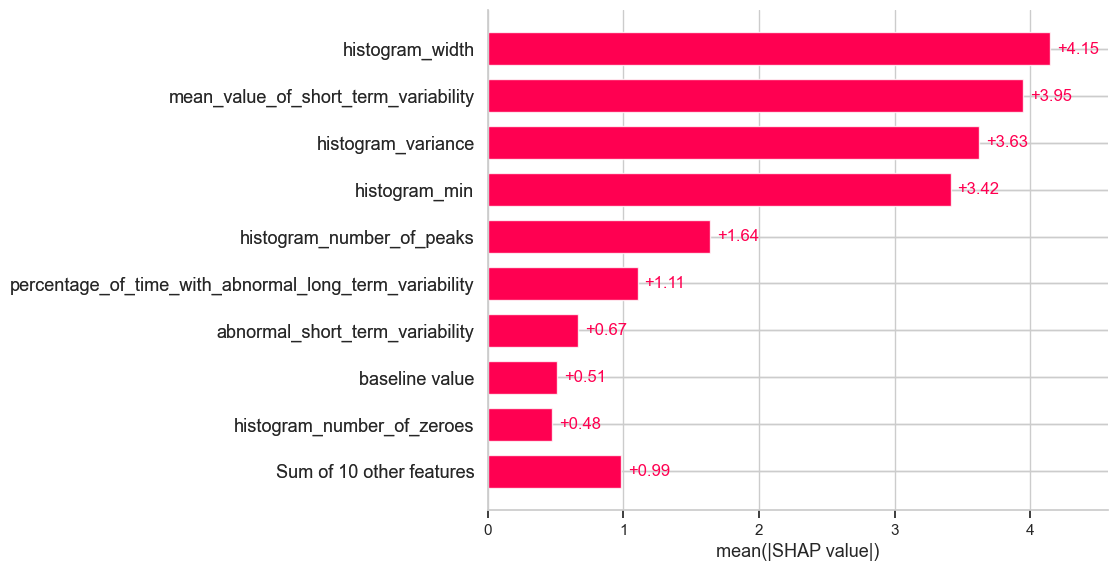

In [86]:
shap.plots.bar(shap_expl_custom_xgb, max_display=10)

## Clustering 

### KMeans Standard

### Prepare the data

In [87]:
import umap
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.spatial.distance import pdist, squareform
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

In [88]:
X_clustering = df.drop(columns=["fetal_health", "risk_score"], errors="ignore")

In [89]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clustering)

### Dimensionality Reduction using UMAP

In [90]:
reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = reducer.fit_transform(X_scaled)

/Applications/anaconda3/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


### K - Means 

In [91]:
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(X_umap)

In [92]:
df_clusters_umap = df.copy()
df_clusters_umap["Cluster"] = cluster_labels

### Evaluation function

In [93]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.spatial.distance import pdist, squareform
import numpy as np

def evaluate_clustering(X, labels, name="Clustering"):
    sil = silhouette_score(X, labels)
    db = davies_bouldin_score(X, labels)
    def dunn_index(X, labels):
        distances = squareform(pdist(X))
        unique_labels = np.unique(labels)
        inter_cluster = np.inf
        intra_cluster = 0
        for i in unique_labels:
            cluster_i = X[labels == i]
            intra_cluster = max(intra_cluster, np.max(pdist(cluster_i)) if len(cluster_i) > 1 else 0)
            for j in unique_labels:
                if i != j:
                    cluster_j = X[labels == j]
                    dist = np.min(pdist(np.vstack([cluster_i, cluster_j]))[-len(cluster_j):])
                    inter_cluster = min(inter_cluster, dist)
        return inter_cluster / intra_cluster if intra_cluster > 0 else 0
    
    dunn = dunn_index(X, labels)
    
    print(f"\n{name} Evaluation:")
    print(f"Silhouette Score       : {sil:.4f}")
    print(f"Davies-Bouldin Index   : {db:.4f}")
    print(f"Dunn Index             : {dunn:.4f}")


In [94]:
cluster_to_risk = {
    0: "Moderate Risk",
    1: "High Risk",
    2: "Low Risk"
}
df_clusters_umap["Risk Group"] = df_clusters_umap["Cluster"].map(cluster_to_risk)

In [95]:
evaluate_clustering(X_umap, cluster_labels, name="KMeans Clustering on UMAP")


KMeans Clustering on UMAP Evaluation:
Silhouette Score       : 0.4369
Davies-Bouldin Index   : 0.8582
Dunn Index             : 0.0002


### Assign Colors

In [96]:
color_map = {
    "Low Risk": "green",
    "Moderate Risk": "orange",
    "High Risk": "red"
}
colors = df_clusters_umap["Risk Group"].map(color_map)

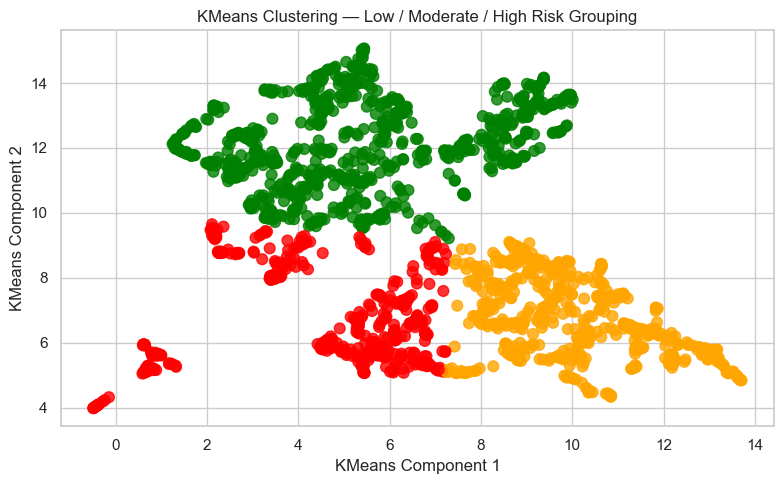

In [97]:
plt.figure(figsize=(8, 5))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=colors, s=60, alpha=0.8)
plt.title("KMeans Clustering — Low / Moderate / High Risk Grouping")
plt.xlabel("KMeans Component 1")
plt.ylabel("KMeans Component 2")
plt.grid(True)
plt.tight_layout()
plt.show()

### K Means on Model Predictions

In [98]:
risk_pred_scores = y_pred_xgb.reshape(-1, 1)
kmeans_risk = KMeans(n_clusters=3, random_state=42)
cluster_labels_risk = kmeans_risk.fit_predict(risk_pred_scores)

cluster_order = np.argsort([np.mean(risk_pred_scores[cluster_labels_risk == i]) for i in range(3)])
cluster_to_risk = {cluster_order[0]: "Low Risk", cluster_order[1]: "Moderate Risk", cluster_order[2]: "High Risk"}

risk_group_labels = pd.Series(cluster_labels_risk).map(cluster_to_risk)

In [99]:
risk_cluster_df = pd.DataFrame({
    "Predicted Risk Score": risk_pred_scores.flatten(),
     "Cluster": cluster_labels_risk,
    "Predicted Risk Group": risk_group_labels
})

print(risk_cluster_df.sample(10))

     Predicted Risk Score  Cluster Predicted Risk Group
264             91.457069        2            High Risk
106             73.190498        2            High Risk
312             16.880331        1             Low Risk
350             42.434174        0        Moderate Risk
351             25.876896        1             Low Risk
308             26.758213        1             Low Risk
211             61.426273        2            High Risk
298             71.316833        2            High Risk
73              17.438726        1             Low Risk
60              76.904739        2            High Risk


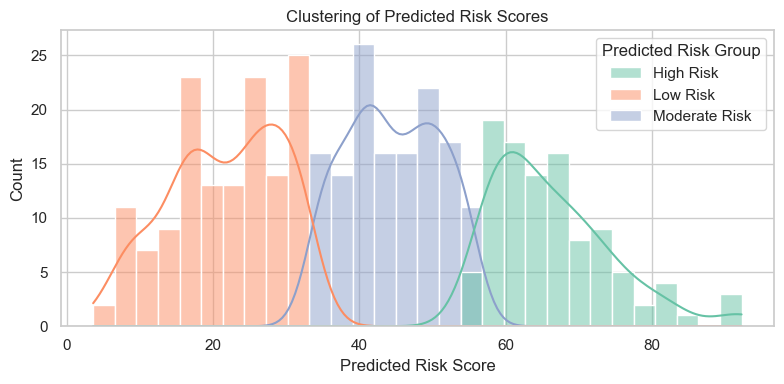

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.histplot(data=risk_cluster_df, x="Predicted Risk Score", hue="Predicted Risk Group", palette="Set2", bins=30, kde=True)
plt.title("Clustering of Predicted Risk Scores")
plt.xlabel("Predicted Risk Score")
plt.ylabel("Count")
plt.grid(True)
plt.tight_layout()
plt.show()


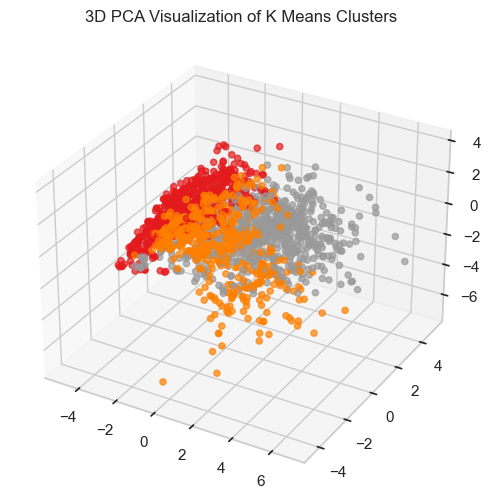

In [101]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

pca3d = PCA(n_components=3)
X_3d = pca3d.fit_transform(X_scaled)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_3d[:, 0], X_3d[:, 1], X_3d[:, 2], c=cluster_labels, cmap="Set1", alpha=0.7)
ax.set_title("3D PCA Visualization of K Means Clusters")
plt.show()

### K Means Custom

In [102]:
X_clustering = df.drop(columns=["fetal_health", "risk_score"], errors="ignore")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clustering)

### Define the function

In [103]:
import numpy as np

class CustomKMeans:
    def __init__(self, n_clusters=3, max_iter=300, random_state=None):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state
        self.centroids = None

    def fit(self, X):
        np.random.seed(self.random_state)
        random_indices = np.random.choice(X.shape[0], self.n_clusters, replace=False)
        self.centroids = X[random_indices]

        for _ in range(self.max_iter):
            labels = self.predict(X)
            new_centroids = np.array([
                X[labels == i].mean(axis=0) if np.any(labels == i) else self.centroids[i]
                for i in range(self.n_clusters)
            ])
            if np.allclose(self.centroids, new_centroids):
                break
            self.centroids = new_centroids

    def predict(self, X):
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)

### Apply UMAP

In [104]:
reducer = umap.UMAP(n_components=2, random_state=42)
X_umap_custom = reducer.fit_transform(X_scaled)

/Applications/anaconda3/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


### Fit the model

In [105]:
custom_kmeans = CustomKMeans(n_clusters=3, max_iter=300, random_state=42)
custom_kmeans.fit(X_umap_custom)
cluster_labels_custom = custom_kmeans.predict(X_umap_custom)

In [106]:
df_clusters_custom = df.copy()
df_clusters_custom["Cluster"] = cluster_labels_custom

In [107]:
cluster_means = df_clusters_custom.groupby("Cluster")["risk_score"].mean().sort_values()
cluster_to_risk = {
    cluster_means.index[0]: "Low Risk",
    cluster_means.index[1]: "Moderate Risk",
    cluster_means.index[2]: "High Risk"
}
df_clusters_custom["Risk Group"] = df_clusters_custom["Cluster"].map(cluster_to_risk)

In [108]:
evaluate_clustering(X_umap_custom, cluster_labels_custom, name="Custom KMeans on UMAP")


Custom KMeans on UMAP Evaluation:
Silhouette Score       : 0.4408
Davies-Bouldin Index   : 0.8412
Dunn Index             : 0.0001


### Assign colors

In [109]:
color_map = {
    "Low Risk": "green",
    "Moderate Risk": "orange",
    "High Risk": "red"
}
colors = df_clusters_custom["Risk Group"].map(color_map)

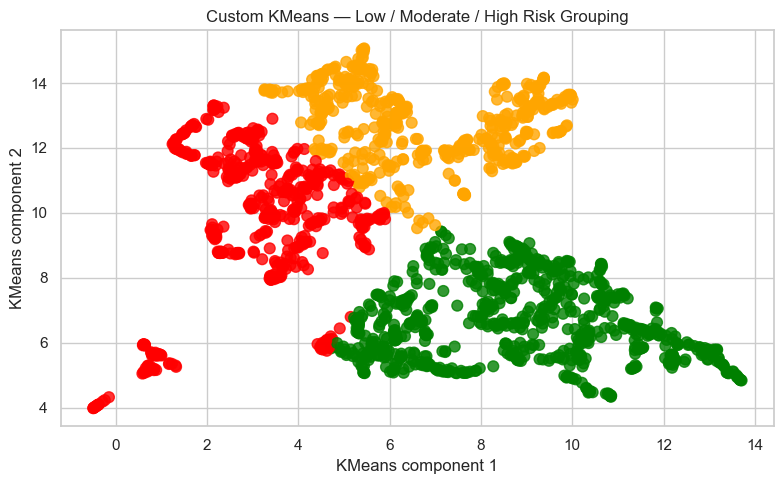

In [110]:
plt.figure(figsize=(8, 5))
plt.scatter(X_umap_custom[:, 0], X_umap_custom[:, 1], c=colors, s=60, alpha=0.8)
plt.title("Custom KMeans — Low / Moderate / High Risk Grouping")
plt.xlabel("KMeans component 1")
plt.ylabel("KMeans component 2")
plt.grid(True)
plt.tight_layout()
plt.show()

### Custom K Means on Model predictions

In [111]:
risk_pred_scores = y_pred_xgb.reshape(-1, 1)
custom_kmeans_risk = CustomKMeans(n_clusters=3, max_iter=300, random_state=42)
custom_kmeans_risk.fit(risk_pred_scores)
cluster_labels_risk = custom_kmeans_risk.predict(risk_pred_scores)

In [112]:
cluster_order = np.argsort([np.mean(risk_pred_scores[cluster_labels_risk == i]) for i in range(3)])
cluster_to_risk = {
    cluster_order[0]: "Low Risk",
    cluster_order[1]: "Moderate Risk",
    cluster_order[2]: "High Risk"
}
risk_group_labels = pd.Series(cluster_labels_risk).map(cluster_to_risk)

In [113]:
risk_cluster_df = pd.DataFrame({
    "Predicted Risk Score": risk_pred_scores.flatten(),
    "Cluster": cluster_labels_risk,
    "Predicted Risk Group": risk_group_labels
})

print(risk_cluster_df.sample(10))

     Predicted Risk Score  Cluster Predicted Risk Group
103             67.369003        2            High Risk
97              30.300577        1        Moderate Risk
280             59.455761        2            High Risk
67              52.757362        2            High Risk
347             58.039536        2            High Risk
78              61.947441        2            High Risk
54              66.556786        2            High Risk
109             28.033131        0             Low Risk
323             70.003471        2            High Risk
168             15.728119        0             Low Risk


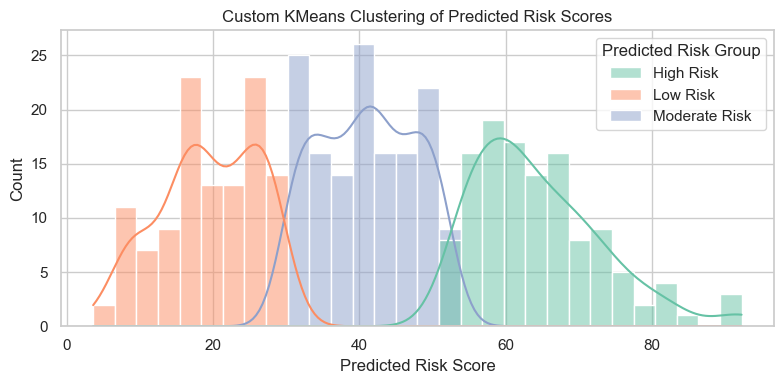

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.histplot(data=risk_cluster_df,
             x="Predicted Risk Score",
             hue="Predicted Risk Group",
             palette="Set2",
             bins=30,
             kde=True)
plt.title("Custom KMeans Clustering of Predicted Risk Scores")
plt.xlabel("Predicted Risk Score")
plt.ylabel("Count")
plt.grid(True)
plt.tight_layout()
plt.show()

## Hierarchical Clustering Standard

### Prepare data

In [115]:
X_hier = df.drop(columns=["fetal_health", "risk_score"], errors="ignore")

In [116]:
scaler_hier = StandardScaler()
X_scaled_hier = scaler_hier.fit_transform(X_hier)

### Apply Umap Dimensionality Reduction

In [117]:
reducer = umap.UMAP(n_components=2, random_state=42)
X_umap_hier = reducer.fit_transform(X_scaled_hier)

/Applications/anaconda3/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


### Clustering

In [118]:
from sklearn.cluster import AgglomerativeClustering

hierarchical = AgglomerativeClustering(n_clusters=3)
cluster_labels_hier = hierarchical.fit_predict(X_umap_hier)
df_clusters_hier = df.copy()

df_clusters_hier["Cluster"] = cluster_labels_hier

In [119]:
cluster_order = np.argsort([
    X_umap_hier[cluster_labels_hier == i][:, 0].mean() for i in range(3)
])
cluster_to_risk = {
    cluster_order[0]: "Low Risk",
    cluster_order[1]: "Moderate Risk",
    cluster_order[2]: "High Risk"
}

df_clusters_hier["Risk Group"] = df_clusters_hier["Cluster"].map(cluster_to_risk)


In [120]:
evaluate_clustering(X_umap_hier, cluster_labels_hier, name="Hierarchical Clustering Standard")


Hierarchical Clustering Standard Evaluation:
Silhouette Score       : 0.4299
Davies-Bouldin Index   : 0.8021
Dunn Index             : 0.0002


### Visualize clusters

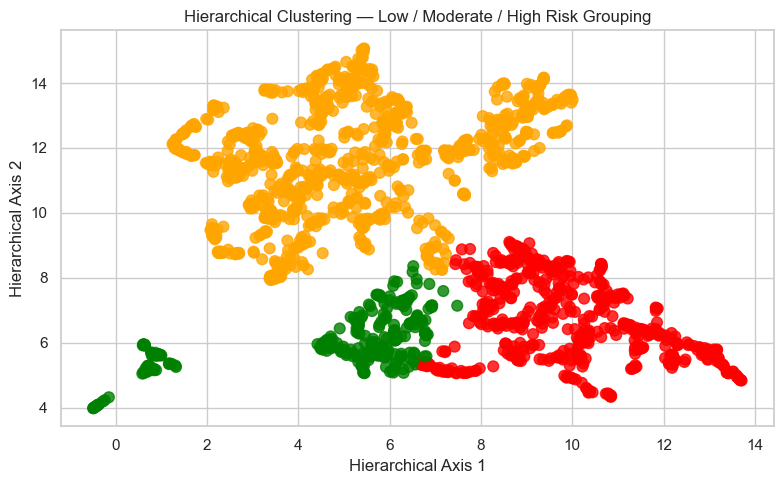

In [121]:
import matplotlib.pyplot as plt

color_map = {
    "Low Risk": "green",
    "Moderate Risk": "orange",
    "High Risk": "red"
}
colors = df_clusters_hier["Risk Group"].map(color_map)

plt.figure(figsize=(8, 5))
plt.scatter(X_umap_hier[:, 0], X_umap_hier[:, 1], c=colors, s=60, alpha=0.8)
plt.title("Hierarchical Clustering — Low / Moderate / High Risk Grouping")
plt.xlabel("Hierarchical Axis 1")
plt.ylabel("Hierarchical Axis 2")
plt.grid(True)
plt.tight_layout()
plt.show()

### Hierarchical on Predicted Scores

In [122]:
risk_pred_scores = y_pred_xgb.reshape(-1, 1) 

In [123]:
agg_model = AgglomerativeClustering(n_clusters=3)
cluster_labels_pred = agg_model.fit_predict(risk_pred_scores)

In [124]:
cluster_order = np.argsort([np.mean(risk_pred_scores[cluster_labels_pred == i]) for i in range(3)])

cluster_to_risk = {
    cluster_order[0]: "Low Risk",
    cluster_order[1]: "Moderate Risk",
    cluster_order[2]: "High Risk"
}

risk_group_labels = pd.Series(cluster_labels_pred).map(cluster_to_risk)

In [125]:
risk_cluster_df_hier = pd.DataFrame({
    "Predicted Risk Score": risk_pred_scores.flatten(),
    "Cluster": cluster_labels_pred,
    "Predicted Risk Group": risk_group_labels
})


print(risk_cluster_df_hier.sample(10))

     Predicted Risk Score  Cluster Predicted Risk Group
181             51.715889        2        Moderate Risk
264             91.457069        1            High Risk
109             28.033131        0             Low Risk
298             71.316833        1            High Risk
312             16.880331        0             Low Risk
170              8.069846        0             Low Risk
95              82.528435        1            High Risk
166             42.653755        2        Moderate Risk
324             60.083820        1            High Risk
161             66.309792        1            High Risk


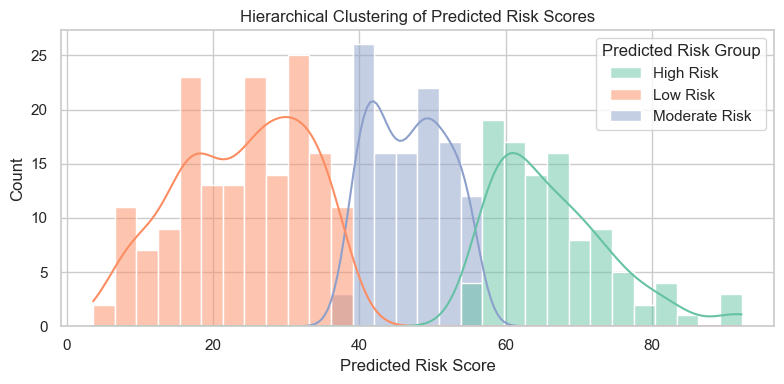

In [126]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.histplot(data=risk_cluster_df_hier,
             x="Predicted Risk Score",
             hue="Predicted Risk Group",
             palette="Set2",
             bins=30,
             kde=True)
plt.title("Hierarchical Clustering of Predicted Risk Scores")
plt.xlabel("Predicted Risk Score")
plt.ylabel("Count")
plt.grid(True)
plt.tight_layout()
plt.show()


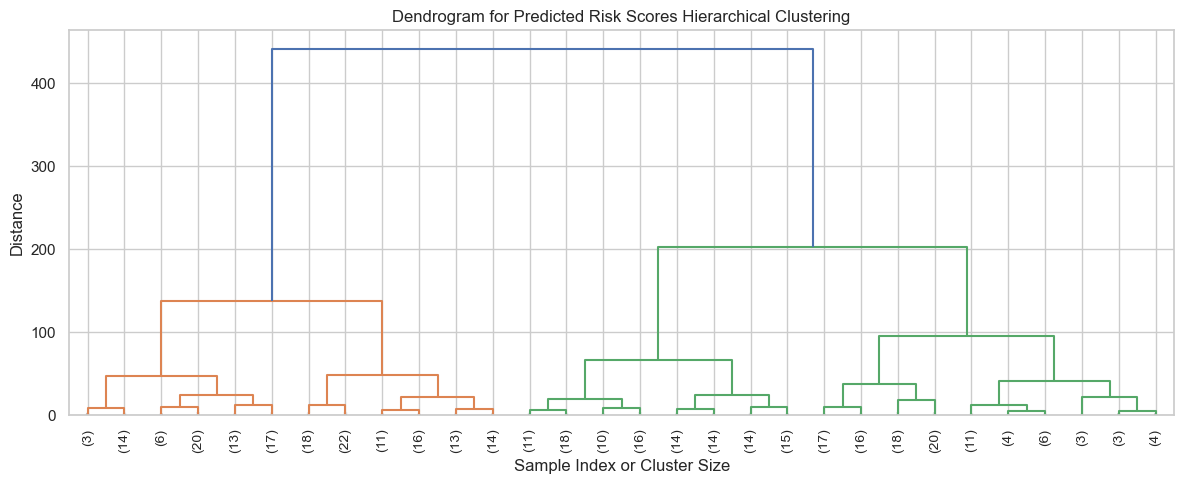

In [127]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import numpy as np

risk_pred_scores = y_pred_xgb.reshape(-1, 1)
Z = linkage(risk_pred_scores, method='ward')
plt.figure(figsize=(12, 5))
dendrogram(Z, truncate_mode='lastp', p=30, leaf_rotation=90., leaf_font_size=10., show_contracted=True)
plt.title("Dendrogram for Predicted Risk Scores Hierarchical Clustering")
plt.xlabel("Sample Index or Cluster Size")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()


#### The dendrogram shows that predicted fetal risk scores naturally group into three distinct clusters—Low, Moderate, and High.

/var/folders/b1/16_x6jsn3gl1_mr01w2trxyc0000gn/T/ipykernel_40622/1909962621.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_hc, x="Cluster", y="Predicted Risk Score", palette="Set2")


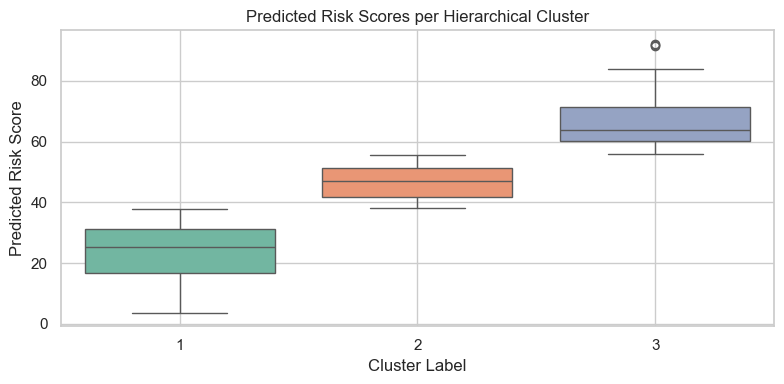

         count       mean       std        min        25%        50%  \
Cluster                                                                
1        167.0  23.897747  8.735382   3.593210  16.845623  25.347147   
2        112.0  46.805107  5.099053  38.263805  41.791265  47.174189   
3        102.0  66.399055  8.184916  55.962711  60.087590  63.905514   

               75%        max  
Cluster                        
1        31.105208  37.795555  
2        51.207240  55.524715  
3        71.346336  92.238274  


In [128]:
from scipy.cluster.hierarchy import linkage, fcluster

risk_pred_scores = y_pred_xgb.reshape(-1, 1)

Z = linkage(risk_pred_scores, method='ward')
labels = fcluster(Z, t=3, criterion='maxclust')
df_hc = pd.DataFrame({
    "Predicted Risk Score": risk_pred_scores.flatten(),
    "Cluster": labels
})
plt.figure(figsize=(8, 4))
sns.boxplot(data=df_hc, x="Cluster", y="Predicted Risk Score", palette="Set2")
plt.title("Predicted Risk Scores per Hierarchical Cluster")
plt.xlabel("Cluster Label")
plt.ylabel("Predicted Risk Score")
plt.grid(True)
plt.tight_layout()
plt.show()

print(df_hc.groupby("Cluster")["Predicted Risk Score"].describe())


## Hierarchical Clustering Custom

### Prepare data

In [129]:
X_clustering_custom = df.drop(columns=["fetal_health", "risk_score"], errors="ignore")

In [130]:
scaler_custom = StandardScaler()
X_scaled_custom = scaler_custom.fit_transform(X_clustering_custom)

### Apply UMap dimensionality Reduction

In [131]:
reducer_hc = umap.UMAP(n_components=2, random_state=42)
X_umap_hc = reducer_hc.fit_transform(X_scaled_custom)

/Applications/anaconda3/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


### Clustering

In [132]:
Z_umap_hc = linkage(X_umap_hc, method='ward')
cluster_labels_umap_hc = fcluster(Z_umap_hc, t=3, criterion='maxclust')

df_hc_umap = df.copy()
df_hc_umap["Cluster"] = cluster_labels_umap_hc

### Define the model function

In [133]:
import numpy as np

class HierarchicalClusteringScratch:
    def __init__(self, n_clusters=3):
        self.n_clusters = n_clusters

    def fit(self, X):
        X = np.array(X)
        n = len(X)
        self.labels_ = np.zeros(n, dtype=int)
        clusters = {i: [i] for i in range(n)}
        dist_matrix = np.linalg.norm(X[:, np.newaxis] - X, axis=2)

        dists = {}
        for i in range(n):
            for j in range(i + 1, n):
                dists[(i, j)] = dist_matrix[i][j]

        next_cluster_id = n
        while len(clusters) > self.n_clusters:
            i, j = min(dists, key=dists.get)

            new_cluster = clusters[i] + clusters[j]
            del clusters[i]
            del clusters[j]

            clusters[next_cluster_id] = new_cluster

            dists = {k: v for k, v in dists.items() if i not in k and j not in k}
            for k in clusters:
                if k == next_cluster_id:
                    continue
                c1 = np.array([X[p] for p in clusters[next_cluster_id]])
                c2 = np.array([X[p] for p in clusters[k]])
                avg_dist = np.mean([np.linalg.norm(a - b) for a in c1 for b in c2])
                dists[(min(next_cluster_id, k), max(next_cluster_id, k))] = avg_dist

            next_cluster_id += 1

        for label, indices in enumerate(clusters.values()):
            for i in indices:
                self.labels_[i] = label

        return self


### Fit the Model

In [134]:
hc_custom = HierarchicalClusteringScratch(n_clusters=3)
hc_custom.fit(X_umap_hc)

cluster_labels_custom_hc = hc_custom.labels_

### Map clusters

In [135]:
df_hc_umap_custom = df.copy()
df_hc_umap_custom["Cluster"] = cluster_labels_custom_hc

In [136]:
cluster_means = df_hc_umap_custom.groupby("Cluster")["risk_score"].mean().sort_values()

cluster_to_risk = {
    cluster_means.index[0]: "Low Risk",
    cluster_means.index[1]: "Moderate Risk",
    cluster_means.index[2]: "High Risk"
}

df_hc_umap_custom["Risk Group"] = df_hc_umap_custom["Cluster"].map(cluster_to_risk)

### Evaluate clustering

In [137]:
evaluate_clustering(X_umap_hc, cluster_labels_custom_hc, name="Custom Hierarchical Clustering")


Custom Hierarchical Clustering Evaluation:
Silhouette Score       : 0.4748
Davies-Bouldin Index   : 0.6665
Dunn Index             : 0.0002


In [138]:
color_map = {
    "Low Risk": "green",
    "Moderate Risk": "orange",
    "High Risk": "red"
}
colors = df_hc_umap_custom["Risk Group"].map(color_map)

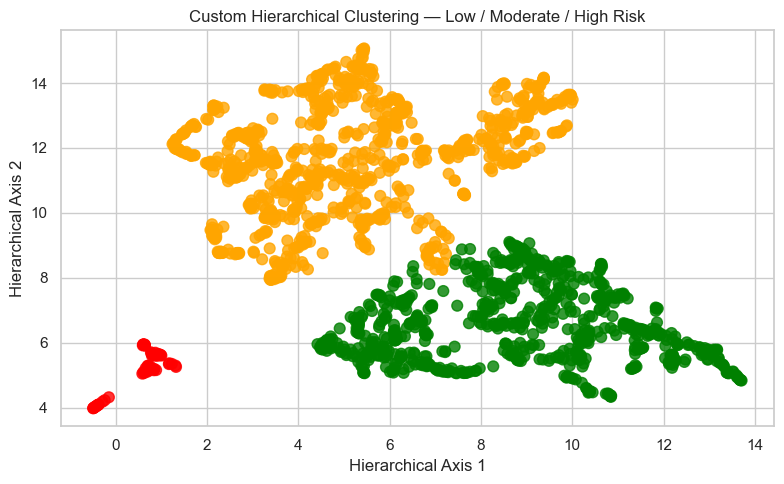

In [139]:
plt.figure(figsize=(8, 5))
plt.scatter(X_umap_hc[:, 0], X_umap_hc[:, 1], c=colors, s=60, alpha=0.8)
plt.title("Custom Hierarchical Clustering — Low / Moderate / High Risk")
plt.xlabel("Hierarchical Axis 1")
plt.ylabel("Hierarchical Axis 2")
plt.grid(True)
plt.tight_layout()
plt.show()

### Hierarchical Clustering on Predicted Scores

In [140]:
risk_pred_scores = y_pred_xgb.reshape(-1, 1)
hc_custom_risk = HierarchicalClusteringScratch(n_clusters=3)
hc_custom_risk.fit(risk_pred_scores)

cluster_labels_risk_custom = hc_custom_risk.labels_

In [141]:
df_custom_risk = pd.DataFrame({
    "Predicted Risk Score": risk_pred_scores.flatten(),
    "Cluster": cluster_labels_risk_custom
})

cluster_means = df_custom_risk.groupby("Cluster")["Predicted Risk Score"].mean().sort_values()
cluster_to_risk = {
    cluster_means.index[0]: "Low Risk",
    cluster_means.index[1]: "Moderate Risk",
    cluster_means.index[2]: "High Risk"
}

df_custom_risk["Predicted Risk Group"] = df_custom_risk["Cluster"].map(cluster_to_risk)

print(df_custom_risk.sample(10))

     Predicted Risk Score  Cluster Predicted Risk Group
124             63.089882        2        Moderate Risk
212             21.726498        1             Low Risk
199             39.486988        2        Moderate Risk
319             34.900436        1             Low Risk
159             48.756863        2        Moderate Risk
27              62.001640        2        Moderate Risk
218             54.400684        2        Moderate Risk
264             91.457069        0            High Risk
120             16.412642        1             Low Risk
300             41.310539        2        Moderate Risk


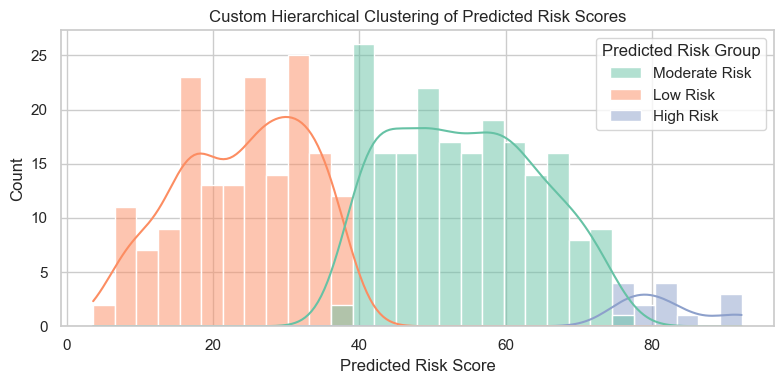

In [142]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.histplot(
    data=df_custom_risk,
    x="Predicted Risk Score",
    hue="Predicted Risk Group",
    palette="Set2",
    bins=30,
    kde=True
)
plt.title("Custom Hierarchical Clustering of Predicted Risk Scores")
plt.xlabel("Predicted Risk Score")
plt.ylabel("Count")
plt.grid(True)
plt.tight_layout()
plt.show()


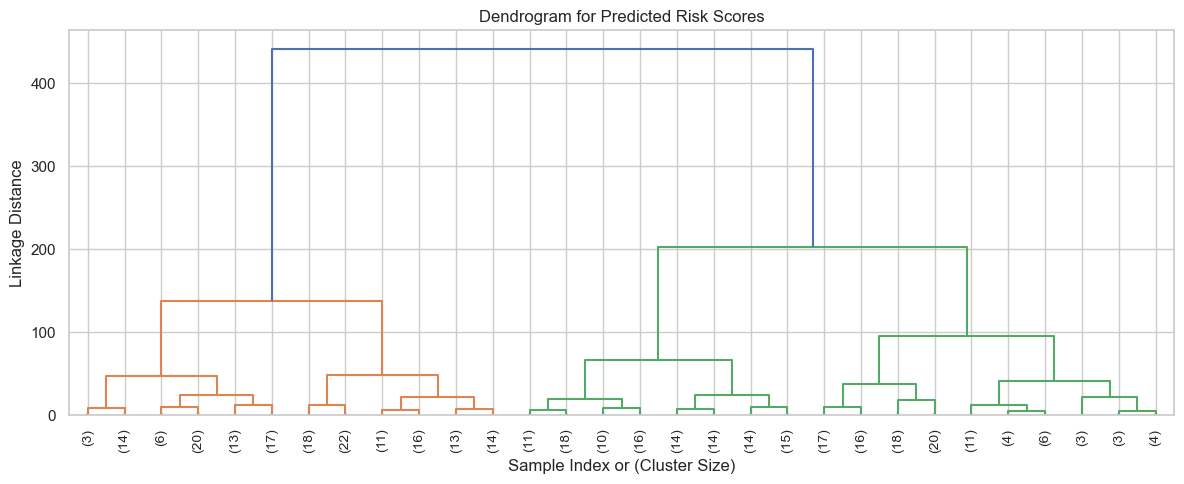

In [143]:
plt.figure(figsize=(12, 5))
dendrogram(Z, truncate_mode='lastp', p=30, leaf_rotation=90., leaf_font_size=10., show_contracted=True)
plt.title("Dendrogram for Predicted Risk Scores")
plt.xlabel("Sample Index or (Cluster Size)")
plt.ylabel("Linkage Distance")
plt.tight_layout()
plt.show()


#### This dendrogram separates samples into three main branches at a linkage distance around 400, confirming the presence of distinct Low, Moderate, and High fetal risk clusters based on model predictions. 

In [144]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

models_predictions = {
    "Standard Ridge": y_pred_ridge,
    "Custom Ridge": y_pred_ridge_custom,
    "Standard Random Forest": y_pred_rf,
    "Custom Random Forest": y_pred_custom_rf,
    "Standard XGBoost": y_pred_xgb,
    "Custom XGBoost": y_pred_custom_xgb
}
metrics_table = []

for model_name, predictions in models_predictions.items():
    mae = mean_absolute_error(y_test, predictions)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    r2 = r2_score(y_test, predictions)

    metrics_table.append({
        "Model": model_name,
        "MAE": round(mae, 2),
        "RMSE": round(rmse, 2),
        "R²": round(r2, 4)
    })

results_df = pd.DataFrame(metrics_table)
results_df

Model   MAE  RMSE      R²
0          Standard Ridge  0.10  0.12  1.0000
1            Custom Ridge  0.20  0.23  0.9999
2  Standard Random Forest  1.55  2.20  0.9870
3    Custom Random Forest  1.82  2.56  0.9824
4        Standard XGBoost  1.27  1.67  0.9924
5          Custom XGBoost  1.52  2.04  0.9888

In [145]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.spatial.distance import pdist, squareform
def dunn_index(X, labels):
    distances = squareform(pdist(X))
    unique_labels = np.unique(labels)
    inter_cluster = np.inf
    intra_cluster = 0
    for i in unique_labels:
        cluster_i = X[labels == i]
        intra_cluster = max(intra_cluster, np.max(pdist(cluster_i)) if len(cluster_i) > 1 else 0)
        for j in unique_labels:
            if i != j:
                cluster_j = X[labels == j]
                dist = np.min(pdist(np.vstack([cluster_i, cluster_j]))[-len(cluster_j):])
                inter_cluster = min(inter_cluster, dist)
    return inter_cluster / intra_cluster if intra_cluster > 0 else 0
    
clustering_models = {
    "Standard KMeans": (X_umap, cluster_labels),
    "Custom KMeans": (X_umap_custom, cluster_labels_custom),
    "Standard Hierarchical": (risk_pred_scores, cluster_labels_pred),
    "Custom Hierarchical": (risk_pred_scores, cluster_labels_risk_custom)
}

clustering_metrics = []

for model_name, (X, labels) in clustering_models.items():
    silhouette = silhouette_score(X, labels)
    db_index = davies_bouldin_score(X, labels)
    dunn = dunn_index(X, labels)

    clustering_metrics.append({
        "Model": model_name,
        "Silhouette Score": round(silhouette, 4),
        "Davies-Bouldin Index": round(db_index, 4),
        "Dunn Index": round(dunn, 4)
    })

clustering_df = pd.DataFrame(clustering_metrics)
clustering_df

Model  Silhouette Score  Davies-Bouldin Index  Dunn Index
0        Standard KMeans            0.4369                0.8582      0.0002
1          Custom KMeans            0.4408                0.8412      0.0001
2  Standard Hierarchical            0.5329                0.5457      0.0005
3    Custom Hierarchical            0.5069                0.5078      0.0005